In [1]:
import os
import numpy as np
import nibabel as nib
from scipy.stats import scoreatpercentile, linregress
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.multitest import multipletests
import pandas as pd
import seaborn as sns

# Functions

In [2]:
patientsASL_interictal = ["sub-patient002","sub-patient003","sub-patient005","sub-patient006","sub-patient007","sub-patient008","sub-patient009","sub-patient012","sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsASL_preictal = ["sub-patient005","sub-patient006","sub-patient008","sub-patient009","sub-patient013", "sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsASL_ictal = ["sub-patient001","sub-patient003","sub-patient004","sub-patient005","sub-patient006","sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient045","sub-patient052"]
patientsASL_postictal = ["sub-patient003","sub-patient005","sub-patient006","sub-patient008","sub-patient009","sub-patient012","sub-patient034", "sub-patient038","sub-patient041", "sub-patient043","sub-patient045"]

patientsCVR_interictal = ["sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsCVR_preictal = ["sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsCVR_ictal = ["sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient045","sub-patient052"] # !!! SUB-PATIENT004 NOT INCLUDED FOR NOW
patientsCVR_postictal = ["sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]

ASLcontrols_midcycle = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control031","sub-control033","sub-control044","sub-control046","sub-control048","sub-control049","sub-control051"]
ASLcontrols_premens = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control031","sub-control033","sub-control044","sub-control046","sub-control048","sub-control049","sub-control051"]

CVRcontrols_midcycle = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control033","sub-control046","sub-control048","sub-control051"]
CVRcontrols_premens = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control031","sub-control033","sub-control044","sub-control046","sub-control048","sub-control051"]

## Calculate values

In [3]:
def roi_vasc(patientlist, ses,vasclabel):

    all_hypothal = []
    all_aPHG = []
    all_pPHG = []
    all_acc = []
    all_mcc = []
    all_pcc = []
    all_insula = []
    all_mfg = []
    all_lg = []
    all_cb = []
    all_fg = []
    all_OIL = []
    all_OIR = []
    all_OML = []
    all_OMR = []
    all_Ramyg = []
    all_Lamyg = []
    all_Rthal = []
    all_Lthal = []
    all_brainstem = []
    all_Rputamen = []
    all_Lputamen = []



    # atlas rois path

    hypothal_path = "/home/bpereira/anat/hth_thr_bin.nii"
    aPHG_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_anterior_parahippocampal-gyrus_bin.nii.gz"
    pPHG_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_posterior_parahippocampal-gyrus_bin.nii.gz"
    acc_path = "/home/bpereira/anat/AAL116_CingAnt_bin.nii.gz"
    mcc_path = "/home/bpereira/anat/AAL116_CingMid_bin.nii.gz"
    pcc_path = "/home/bpereira/anat/AAL116_CingPost_bin.nii.gz"
    #ofg_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_occipital-fusiform-gyrus_bin.nii.gz"
    insula_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_insular-cortex_bin.nii.gz"
    mfg_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_middle-frontal-gyrus_bin.nii.gz"
    lg_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_lingual-gyrus_bin.nii.gz"
    cb_path = "/home/bpereira/anat/atlas_ROIs/mni_cerebellum_bin.nii.gz"
    fg_path = "/home/bpereira/anat/AAL116_Fusiform_bin.nii.gz"
    OIL_path = "/home/bpereira/anat/AAL116_Occipital_InfL_bin.nii.gz"
    OIR_path = "/home/bpereira/anat/AAL116_Occipital_InfR_bin.nii.gz"
    OML_path = "/home/bpereira/anat/AAL116_Occipital_MidL_bin.nii.gz"
    OMR_path = "/home/bpereira/anat/AAL116_Occipital_MidR_bin.nii.gz"

    hypothalmask = nib.load(hypothal_path).get_fdata().flatten()
    aPHGmask = nib.load(aPHG_path).get_fdata().flatten()
    pPHGmask = nib.load(pPHG_path).get_fdata().flatten()
    accmask = nib.load(acc_path).get_fdata().flatten()
    mccmask = nib.load(mcc_path).get_fdata().flatten()
    pccmask = nib.load(pcc_path).get_fdata().flatten()
    #ofgmask = nib.load(ofg_path).get_fdata().flatten() not using OFG
    insulamask = nib.load(insula_path).get_fdata().flatten()
    mfgmask = nib.load(mfg_path).get_fdata().flatten()
    lgmask = nib.load(lg_path).get_fdata().flatten()
    cbmask = nib.load(cb_path).get_fdata().flatten()
    fgmask = nib.load(fg_path).get_fdata().flatten()
    OILmask = nib.load(OIL_path).get_fdata().flatten()
    OIRmask = nib.load(OIR_path).get_fdata().flatten()
    OMLmask = nib.load(OML_path).get_fdata().flatten()
    OMRmask = nib.load(OMR_path).get_fdata().flatten()

    for sub in patientlist:

        if vasclabel=='ASL':
            vasc_path = os.path.join("/home/mig_n2treatdata/derivatives/perf-preproc/",sub,ses,"smoothed8_perfusion_MNI.nii")
        else:
            vasc_path = os.path.join("/home/mig_n2treatdata/derivatives/func-preproc/func-task_breathhold/",sub,ses,"smoothed8_CVR_single_delay6_deltapet_thrvar_MNI.nii")

        vascnii = nib.load(vasc_path)
        vasc = vascnii.get_fdata().flatten()

        # first to MNI roi paths
        
        Ramygmask_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/RamygdalaMNI_bin.nii.gz")
        Lamygmask_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/LamygdalaMNI_bin.nii.gz")
        Rthal_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/RthalamusMNI_bin.nii.gz")
        Lthal_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/LthalamusMNI_bin.nii.gz")
        brainstem_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/brainstemMNI_bin.nii.gz")
        Rputamen_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/RputamenMNI_bin.nii.gz")
        Lputamen_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/LputamenMNI_bin.nii.gz")

        Ramygmask = nib.load(Ramygmask_path).get_fdata().flatten()
        Lamygmask = nib.load(Lamygmask_path).get_fdata().flatten()
        Rthalmask = nib.load(Rthal_path).get_fdata().flatten()
        Lthalmask = nib.load(Lthal_path).get_fdata().flatten()
        brainstemmask = nib.load(brainstem_path).get_fdata().flatten()
        Rputamenmask = nib.load(Rputamen_path).get_fdata().flatten()
        Lputamenmask = nib.load(Lputamen_path).get_fdata().flatten()

        hypothal_ind = np.where(hypothalmask == 1)
        aPHG_ind = np.where(aPHGmask == 1)
        pPHG_ind = np.where(pPHGmask == 1)
        acc_ind = np.where(accmask == 1)
        mcc_ind = np.where(mccmask == 1)
        pcc_ind = np.where(pccmask == 1)
        #print(mcc_ind)
        #print(pcc_ind)
        #ofg_ind = np.where(ofgmask == 1)
        insula_ind = np.where(insulamask == 1)
        mfg_ind = np.where(mfgmask == 1)
        lg_ind = np.where(lgmask == 1)
        cb_ind = np.where(cbmask == 1)
        Ramyg_ind = np.where(Ramygmask == 1)
        Lamyg_ind = np.where(Lamygmask == 1)
        Rthal_ind = np.where(Rthalmask == 1)
        Lthal_ind = np.where(Lthalmask == 1)
        brainstem_ind = np.where(brainstemmask == 1)
        Rputamen_ind = np.where(Rputamenmask == 1)
        Lputamen_ind = np.where(Lputamenmask == 1)
        fg_ind = np.where(fgmask == 1)
        OIL_ind = np.where(OILmask == 1)
        OIR_ind = np.where(OIRmask == 1)
        OML_ind = np.where(OMLmask == 1)
        OMR_ind = np.where(OMRmask == 1)

        if vasclabel == 'ASL':

            qvasc1 = scoreatpercentile(vasc,1)
            qvasc99 = scoreatpercentile(vasc,99)

            vasc_non_outliers_ind = np.where((vasc > qvasc1) & (vasc < qvasc99))

            commonvasc_hypothal = np.intersect1d(vasc_non_outliers_ind,hypothal_ind)
            commonvasc_aPHG = np.intersect1d(vasc_non_outliers_ind,aPHG_ind)
            commonvasc_pPHG = np.intersect1d(vasc_non_outliers_ind,pPHG_ind)
            commonvasc_acc = np.intersect1d(vasc_non_outliers_ind,acc_ind)
            commonvasc_mcc = np.intersect1d(vasc_non_outliers_ind,mcc_ind)
            commonvasc_pcc = np.intersect1d(vasc_non_outliers_ind,pcc_ind)
            commonvasc_insula = np.intersect1d(vasc_non_outliers_ind,insula_ind)
            commonvasc_mfg = np.intersect1d(vasc_non_outliers_ind,mfg_ind)
            commonvasc_lg = np.intersect1d(vasc_non_outliers_ind,lg_ind)
            commonvasc_cb = np.intersect1d(vasc_non_outliers_ind,cb_ind)
            commonvasc_Ramyg = np.intersect1d(vasc_non_outliers_ind,Ramyg_ind)
            commonvasc_Lamyg = np.intersect1d(vasc_non_outliers_ind,Lamyg_ind)
            commonvasc_Rthal = np.intersect1d(vasc_non_outliers_ind,Rthal_ind)
            commonvasc_Lthal = np.intersect1d(vasc_non_outliers_ind,Lthal_ind)
            commonvasc_brainstem = np.intersect1d(vasc_non_outliers_ind,brainstem_ind)
            commonvasc_Rputamen = np.intersect1d(vasc_non_outliers_ind,Rputamen_ind)
            commonvasc_Lputamen = np.intersect1d(vasc_non_outliers_ind,Lputamen_ind)
            commonvasc_fg = np.intersect1d(vasc_non_outliers_ind,fg_ind)
            commonvasc_OIL = np.intersect1d(vasc_non_outliers_ind,OIL_ind)
            commonvasc_OIR = np.intersect1d(vasc_non_outliers_ind,OIR_ind)
            commonvasc_OML = np.intersect1d(vasc_non_outliers_ind,OML_ind)
            commonvasc_OMR = np.intersect1d(vasc_non_outliers_ind,OMR_ind)

            meanvasc_hypothal = np.mean(vasc[commonvasc_hypothal])
            meanvasc_aPHG = np.mean(vasc[commonvasc_aPHG])
            meanvasc_pPHG = np.mean(vasc[commonvasc_pPHG])
            meanvasc_acc = np.mean(vasc[commonvasc_acc])
            meanvasc_mcc = np.mean(vasc[commonvasc_mcc])
            meanvasc_pcc = np.mean(vasc[commonvasc_pcc])
            meanvasc_insula = np.mean(vasc[commonvasc_insula])
            meanvasc_mfg = np.mean(vasc[commonvasc_mfg])
            meanvasc_lg = np.mean(vasc[commonvasc_lg])
            meanvasc_cb = np.mean(vasc[commonvasc_cb])
            meanvasc_Ramyg = np.mean(vasc[commonvasc_Ramyg])
            meanvasc_Lamyg = np.mean(vasc[commonvasc_Lamyg])
            meanvasc_Rthal = np.mean(vasc[commonvasc_Rthal])
            meanvasc_Lthal = np.mean(vasc[commonvasc_Lthal])
            meanvasc_brainstem = np.mean(vasc[commonvasc_brainstem])
            meanvasc_Rputamen = np.mean(vasc[commonvasc_Rputamen])
            meanvasc_Lputamen = np.mean(vasc[commonvasc_Lputamen])
            meanvasc_fg = np.mean(vasc[commonvasc_fg])
            meanvasc_OIL = np.mean(vasc[commonvasc_OIL])
            meanvasc_OIR = np.mean(vasc[commonvasc_OIR])
            meanvasc_OML = np.mean(vasc[commonvasc_OML])
            meanvasc_OMR = np.mean(vasc[commonvasc_OMR])

        if vasclabel == 'CVR':
            non_zero = np.where(vasc > 0)
            
            commonvasc_hypothal = np.intersect1d(non_zero, hypothal_ind)
            commonvasc_aPHG = np.intersect1d(non_zero,aPHG_ind)
            commonvasc_pPHG = np.intersect1d(non_zero, pPHG_ind)
            commonvasc_acc = np.intersect1d(non_zero, acc_ind)
            commonvasc_mcc = np.intersect1d(non_zero, mcc_ind)
            commonvasc_pcc = np.intersect1d(non_zero, pcc_ind)
            commonvasc_insula = np.intersect1d(non_zero, insula_ind)
            commonvasc_mfg = np.intersect1d(non_zero, mfg_ind)
            commonvasc_lg = np.intersect1d(non_zero, lg_ind)
            commonvasc_cb = np.intersect1d(non_zero, cb_ind)
            commonvasc_Ramyg = np.intersect1d(non_zero, Ramyg_ind)
            commonvasc_Lamyg = np.intersect1d(non_zero, Lamyg_ind)
            commonvasc_Rthal = np.intersect1d(non_zero, Rthal_ind)
            commonvasc_Lthal = np.intersect1d(non_zero, Lthal_ind)
            commonvasc_brainstem = np.intersect1d(non_zero, brainstem_ind)
            commonvasc_Rputamen = np.intersect1d(non_zero, Rputamen_ind)
            commonvasc_Lputamen = np.intersect1d(non_zero, Lputamen_ind)
            commonvasc_fg = np.intersect1d(non_zero, fg_ind)
            commonvasc_OIL = np.intersect1d(non_zero, OIL_ind)
            commonvasc_OIR = np.intersect1d(non_zero, OIR_ind)
            commonvasc_OML = np.intersect1d(non_zero, OML_ind)
            commonvasc_OMR = np.intersect1d(non_zero, OMR_ind)

            meanvasc_hypothal = np.mean(vasc[commonvasc_hypothal])
            meanvasc_aPHG = np.mean(vasc[commonvasc_aPHG])
            meanvasc_pPHG = np.mean(vasc[commonvasc_pPHG])
            meanvasc_acc = np.mean(vasc[commonvasc_acc])
            meanvasc_mcc = np.mean(vasc[commonvasc_mcc])
            meanvasc_pcc = np.mean(vasc[commonvasc_pcc])
            #meanvasc_ofg = np.mean(vasc[commonvasc_ofg])
            meanvasc_insula = np.mean(vasc[commonvasc_insula])
            meanvasc_mfg = np.mean(vasc[commonvasc_mfg])
            meanvasc_lg = np.mean(vasc[commonvasc_lg])
            meanvasc_cb = np.mean(vasc[commonvasc_cb])
            meanvasc_Ramyg = np.mean(vasc[commonvasc_Ramyg])
            meanvasc_Lamyg = np.mean(vasc[commonvasc_Lamyg])
            meanvasc_Rthal = np.mean(vasc[commonvasc_Rthal])
            meanvasc_Lthal = np.mean(vasc[commonvasc_Lthal])
            meanvasc_brainstem = np.mean(vasc[commonvasc_brainstem])
            meanvasc_Rputamen = np.mean(vasc[commonvasc_Rputamen])
            meanvasc_Lputamen = np.mean(vasc[commonvasc_Lputamen])
            meanvasc_fg = np.mean(vasc[commonvasc_fg])
            meanvasc_OIL = np.mean(vasc[commonvasc_OIL])
            meanvasc_OIR = np.mean(vasc[commonvasc_OIR])
            meanvasc_OML = np.mean(vasc[commonvasc_OML])
            meanvasc_OMR = np.mean(vasc[commonvasc_OMR])

         # mean within each roi
        
        meanvasc_hypothal = np.mean(vasc[commonvasc_hypothal])
        meanvasc_aPHG = np.mean(vasc[commonvasc_aPHG])
        meanvasc_pPHG = np.mean(vasc[commonvasc_pPHG])
        meanvasc_acc = np.mean(vasc[commonvasc_acc])
        meanvasc_mcc = np.mean(vasc[commonvasc_mcc])
        meanvasc_pcc = np.mean(vasc[commonvasc_pcc])
        #meanvasc_ofg = np.mean(vasc[commonvasc_ofg])
        meanvasc_insula = np.mean(vasc[commonvasc_insula])
        meanvasc_mfg = np.mean(vasc[commonvasc_mfg])
        meanvasc_lg = np.mean(vasc[commonvasc_lg])
        meanvasc_cb = np.mean(vasc[commonvasc_cb])
        meanvasc_Ramyg = np.mean(vasc[commonvasc_Ramyg])
        meanvasc_Lamyg = np.mean(vasc[commonvasc_Lamyg])
        meanvasc_Rthal = np.mean(vasc[commonvasc_Rthal])
        meanvasc_Lthal = np.mean(vasc[commonvasc_Lthal])
        meanvasc_brainstem = np.mean(vasc[commonvasc_brainstem])
        meanvasc_Rputamen = np.mean(vasc[commonvasc_Rputamen])
        meanvasc_Lputamen = np.mean(vasc[commonvasc_Lputamen])
        meanvasc_fg = np.mean(vasc[commonvasc_fg])
        meanvasc_OIL = np.mean(vasc[commonvasc_OIL])
        meanvasc_OIR = np.mean(vasc[commonvasc_OIR])
        meanvasc_OML = np.mean(vasc[commonvasc_OML])
        meanvasc_OMR = np.mean(vasc[commonvasc_OMR])

        all_hypothal += [meanvasc_hypothal]
        all_aPHG += [meanvasc_aPHG]
        all_pPHG += [meanvasc_pPHG]
        all_acc += [meanvasc_acc]
        all_mcc += [meanvasc_mcc]
        all_pcc += [meanvasc_pcc]
        all_insula += [meanvasc_insula]
        all_mfg += [meanvasc_mfg]
        all_lg += [meanvasc_lg]
        all_cb += [meanvasc_cb]
        all_Ramyg += [meanvasc_Ramyg]
        all_Lamyg += [meanvasc_Lamyg]
        all_Rthal += [meanvasc_Rthal]
        all_Lthal += [meanvasc_Lthal]
        all_brainstem += [meanvasc_brainstem]
        all_Rputamen += [meanvasc_Rputamen]
        all_Lputamen += [meanvasc_Lputamen]
        all_fg += [meanvasc_fg]
        all_OIL += [meanvasc_OIL]
        all_OIR += [meanvasc_OIR]
        all_OML += [meanvasc_OML]
        all_OMR += [meanvasc_OMR]

    all_vasc = [all_hypothal,all_aPHG,all_pPHG,all_acc,all_mcc,all_pcc,all_insula,all_mfg,all_lg,all_cb,all_Ramyg,all_Lamyg,all_Rthal,all_Lthal, all_brainstem, all_Rputamen, all_Lputamen, all_fg, all_OIL, all_OIR,all_OML,all_OMR]

    return all_vasc







## Plots

In [4]:
def plot_boxplot(data, ROIname, vasclabel):
    """
    Plot a boxplot with significance markers.

    Args:
        data (list): List of data arrays for boxplot.
        ROIname (string): Name of the ROI.

    Returns:
        None
    """
    positions = [1, 2, 3, 4, 5, 6]
    phase_names = ['Midcycle', 'Premenstrual', 'Interictal', 'Preictal', 'Ictal', 'Postictal']

    # Create the boxplot with equal width
    boxprops_green = dict(color="lightgreen", facecolor="lightgreen", linewidth=2)
    boxprops_red = dict(color="lightcoral", facecolor="lightcoral", linewidth=2)
    medianprops_black = dict(color="black", linewidth=2)

    plt.boxplot(data[:-2], positions=positions[:-2], patch_artist=True, boxprops=boxprops_green, medianprops=medianprops_black, widths=0.5)
    plt.boxplot(data[-4:], positions=positions[-4:], patch_artist=True, boxprops=boxprops_red, medianprops=medianprops_black, widths=0.5)

    # Set x-axis labels
    plt.xticks(positions, phase_names, fontsize=8)

    plt.ylabel(f'{vasclabel}')
    plt.title(f'{vasclabel} {ROIname}')

    if vasclabel == 'ASL':
        plt.ylim(15,120)
    else:
        plt.ylim(-0.8,1)

    # Adjust the y-coordinate for counts
    y_min, y_max = plt.ylim()  # Get the current y-axis limits
    y_position = y_min - (0.1 * (y_max - y_min))  # Place counts below the x-axis

    for i, single_data in enumerate(data, start=1):
        count = len(single_data)
        plt.text(i, y_position, f'n={count}', ha='center', va='top', fontsize = 8)


    plt.show()

## Stats

In [5]:
from scipy import stats

def all_stats(data, roi_name):
    results = []
    # results is PER ROI


    # Midcycle vs Interictal
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[2]).pvalue > 0.05:
        midvint = stats.ttest_ind(data[0], data[2])
        results.append(midvint.pvalue)
        print(f"Midcycle vs Interictal for {roi_name}: p-value = {midvint.pvalue:.5f}")
    else:
        midvintwelch = stats.ttest_ind(data[0], data[2], equal_var=False)
        results.append(midvintwelch.pvalue)
        print(f"Midcycle vs Interictal for {roi_name} (Welch): p-value = {midvintwelch.pvalue:.5f}")

    # Premenstrual vs Preictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[3]).pvalue > 0.05:
        premensvpreict = stats.ttest_ind(data[1], data[3])
        results.append(premensvpreict.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name}: p-value = {premensvpreict.pvalue:.5f}")
    else:
        premensvpreictwelch = stats.ttest_ind(data[1], data[3], equal_var=False)
        results.append(premensvpreictwelch.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name} (Welch): p-value = {premensvpreictwelch.pvalue:.5f}")

    # Premenstrual vs Ictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[4]).pvalue > 0.05:
        premensvict = stats.ttest_ind(data[1], data[4])
        results.append(premensvict.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name}: p-value = {premensvict.pvalue:.5f}")
    else:
        premensvictwelch = stats.ttest_ind(data[1], data[4], equal_var=False)
        results.append(premensvictwelch.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name} (Welch): p-value = {premensvictwelch.pvalue:.5f}")

    # Premenstrual vs Postictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[5]).pvalue > 0.05:
        premensvpostict = stats.ttest_ind(data[1], data[5])
        results.append(premensvpostict.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name}: p-value = {premensvpostict.pvalue:.5f}")
    else:
        premensvpostictwelch = stats.ttest_ind(data[1], data[5], equal_var=False)
        results.append(premensvpostictwelch.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name} (Welch): p-value = {premensvpostictwelch.pvalue:.5f}")

    # Midcycle vs Premenstrual
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[1]).pvalue > 0.05:
        midvpremens = stats.ttest_rel(data[0], data[1])
        results.append(midvpremens.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name}: p-value = {midvpremens.pvalue:.5f}")
    else:
        midvpremenswilc = stats.wilcoxon(data[0], data[1])
        results.append(midvpremenswilc.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name} (Wilcoxon): p-value = {midvpremenswilc.pvalue:.5f}")

    return results


In [6]:
from scipy import stats

def all_statsCVR(data, roi_name):
    results = []
    # results is PER ROI


    # Midcycle vs Interictal
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[2]).pvalue > 0.05:
        midvint = stats.ttest_ind(data[0], data[2])
        results.append(midvint.pvalue)
        print(f"Midcycle vs Interictal for {roi_name}: p-value = {midvint.pvalue:.5f}")
    else:
        midvintwelch = stats.ttest_ind(data[0], data[2], equal_var=False)
        results.append(midvintwelch.pvalue)
        print(f"Midcycle vs Interictal for {roi_name} (Welch): p-value = {midvintwelch.pvalue:.5f}")

    # Premenstrual vs Preictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[3]).pvalue > 0.05:
        premensvpreict = stats.ttest_ind(data[1], data[3])
        results.append(premensvpreict.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name}: p-value = {premensvpreict.pvalue:.5f}")
    else:
        premensvpreictwelch = stats.ttest_ind(data[1], data[3], equal_var=False)
        results.append(premensvpreictwelch.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name} (Welch): p-value = {premensvpreictwelch.pvalue:.5f}")

    # Premenstrual vs Ictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[4]).pvalue > 0.05:
        premensvict = stats.ttest_ind(data[1], data[4])
        results.append(premensvict.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name}: p-value = {premensvict.pvalue:.5f}")
    else:
        premensvictwelch = stats.ttest_ind(data[1], data[4], equal_var=False)
        results.append(premensvictwelch.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name} (Welch): p-value = {premensvictwelch.pvalue:.5f}")

    # Premenstrual vs Postictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[5]).pvalue > 0.05:
        premensvpostict = stats.ttest_ind(data[1], data[5])
        results.append(premensvpostict.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name}: p-value = {premensvpostict.pvalue:.5f}")
    else:
        premensvpostictwelch = stats.ttest_ind(data[1], data[5], equal_var=False)
        results.append(premensvpostictwelch.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name} (Welch): p-value = {premensvpostictwelch.pvalue:.5f}")

    # Midcycle vs Premenstrual
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[1]).pvalue > 0.05:
        midvpremens = stats.ttest_ind(data[0], data[1]) # ind because not repeated measures for CVR
        results.append(midvpremens.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name}: p-value = {midvpremens.pvalue:.5f}")
    else:
        midvpremenswelch = stats.ttest_ind(data[0], data[1],equal_var = False)
        results.append(midvpremenswelch.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name} (Welch): p-value = {midvpremenswelch.pvalue:.5f}")

    return results


In [7]:
def norm_test(ses_list, ROI_names, ses):
    shapiro_results = []
    
    for i in range(len(ses_list)):
        shapiro_test = stats.shapiro(ses_list[i])
        shapiro_results += [shapiro_test]

        if shapiro_test.pvalue < 0.05:
            print(f"ROI {ROI_names[i]} session {ses} does not have normal distribution")
            
    return shapiro_results

In [8]:
def organize_pvalues(list):
    midvint = []
    premvpre = []
    premvict = []
    premvpost = []
    midvprem = []
    for roi in list:
        midvint += [roi[0]]
        premvpre += [roi[1]]
        premvict += [roi[2]]
        premvpost += [roi[3]]
        midvprem += [roi[4]]

    return midvint, premvpre, premvict, premvpost, midvprem
        

In [9]:
def organize_pvaluesalt(pvalues_list):
    midvint, premvpre, premvict, premvpost, midvprem = zip(*pvalues_list)
    return list(midvint), list(premvpre), list(premvict), list(premvpost), list(midvprem)


In [10]:
def is_sig(pvalslist,ROI_names,comp):
    sig_ps = []
    for i in range(len(pvalslist)):
        if pvalslist[i] < 0.05:
            print(f"{comp} is significant in {ROI_names[i]}")
            sig_ps+=[pvalslist[i]]
    return sig_ps


# ASL

In [11]:
allROIsASL_mid = roi_vasc(ASLcontrols_midcycle,"ses-midcycle","ASL")
allROIsASL_premens = roi_vasc(ASLcontrols_premens,"ses-premenstrual","ASL")
allROIsASL_int = roi_vasc(patientsASL_interictal,"ses-interictal","ASL")
allROIsASL_preict = roi_vasc(patientsASL_preictal,"ses-preictal","ASL")
allROIsASL_ict = roi_vasc(patientsASL_ictal,"ses-ictal","ASL")
allROIsASL_postict = roi_vasc(patientsASL_postictal,"ses-postictal","ASL")

In [12]:
ROI_names = ['Hypothalamus',"aPHG","pPHG","ACC","MCC","PCC","Insula","MFG","LG","Cb","Ramyg","Lamyg","Rthal","Lthal","Brainstem","Rputamen","Lputamen","FG","OIL","OIR","OML","OMR"]

## Check normality

In [13]:
mid_norm = norm_test(allROIsASL_mid,ROI_names,"midcycle")
print('-'*10)
premens_norm = norm_test(allROIsASL_premens,ROI_names,"premenstrual")
print('-'*10)
int_norm = norm_test(allROIsASL_int,ROI_names,"interictal")
print('-'*10)
preict_norm = norm_test(allROIsASL_preict,ROI_names,"preictal")
print('-'*10)
ict_norm = norm_test (allROIsASL_ict, ROI_names, "ictal")
print('-'*10)
postict_norm = norm_test(allROIsASL_postict, ROI_names, "postictal")
print('-'*10)


----------
ROI Lamyg session premenstrual does not have normal distribution
ROI Lthal session premenstrual does not have normal distribution
----------
ROI Hypothalamus session interictal does not have normal distribution
ROI Cb session interictal does not have normal distribution
ROI Brainstem session interictal does not have normal distribution
----------
ROI OMR session preictal does not have normal distribution
----------
ROI ACC session ictal does not have normal distribution
----------
ROI Cb session postictal does not have normal distribution
----------


## Results + stats

Midcycle vs Interictal for Hypothalamus (Welch): p-value = 0.62353
Premenstrual vs Preictal for Hypothalamus: p-value = 0.40591
Premenstrual vs Ictal for Hypothalamus: p-value = 0.03552
Premenstrual vs Postictal for Hypothalamus: p-value = 0.15944
Midcycle vs Premenstrual for Hypothalamus: p-value = 0.39402


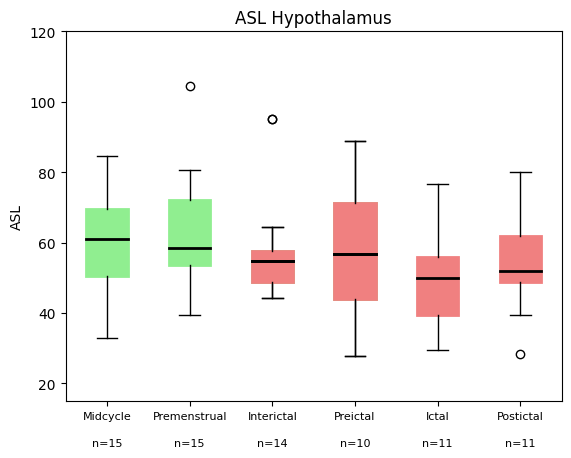

Midcycle vs Interictal for aPHG: p-value = 0.21190
Premenstrual vs Preictal for aPHG: p-value = 0.96517
Premenstrual vs Ictal for aPHG: p-value = 0.13656
Premenstrual vs Postictal for aPHG: p-value = 0.23166
Midcycle vs Premenstrual for aPHG: p-value = 0.53582


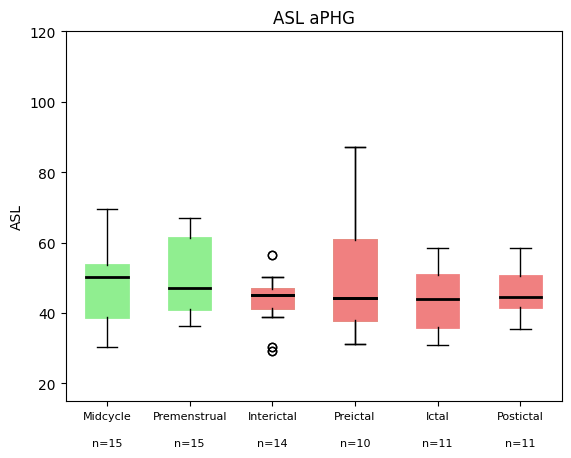

Midcycle vs Interictal for pPHG: p-value = 0.49044
Premenstrual vs Preictal for pPHG: p-value = 0.99328
Premenstrual vs Ictal for pPHG: p-value = 0.10273
Premenstrual vs Postictal for pPHG: p-value = 0.40781
Midcycle vs Premenstrual for pPHG: p-value = 0.42276


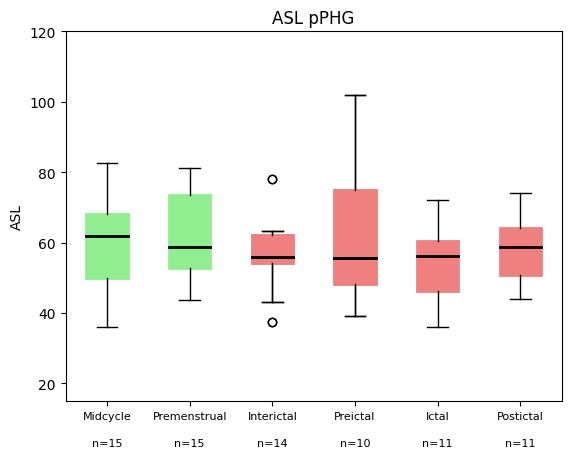

Midcycle vs Interictal for ACC: p-value = 0.27443
Premenstrual vs Preictal for ACC: p-value = 0.49890
Premenstrual vs Ictal for ACC (Welch): p-value = 0.07748
Premenstrual vs Postictal for ACC: p-value = 0.18437
Midcycle vs Premenstrual for ACC: p-value = 0.84391


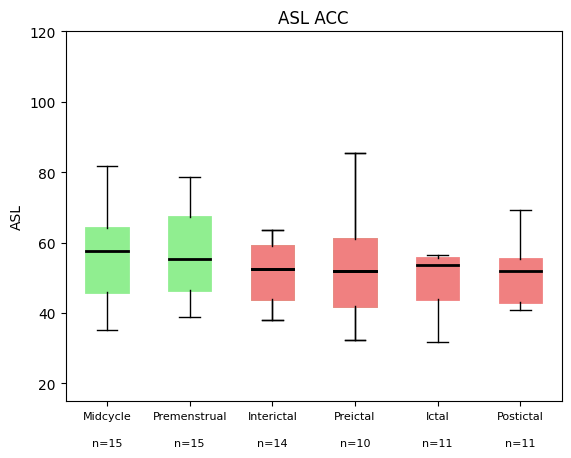

Midcycle vs Interictal for MCC: p-value = 0.21931
Premenstrual vs Preictal for MCC: p-value = 0.63677
Premenstrual vs Ictal for MCC: p-value = 0.09198
Premenstrual vs Postictal for MCC: p-value = 0.27113
Midcycle vs Premenstrual for MCC: p-value = 0.90579


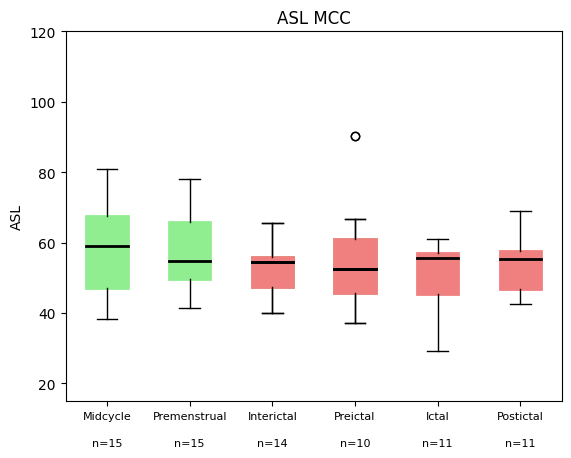

Midcycle vs Interictal for PCC: p-value = 0.48104
Premenstrual vs Preictal for PCC: p-value = 0.86412
Premenstrual vs Ictal for PCC: p-value = 0.15130
Premenstrual vs Postictal for PCC: p-value = 0.55822
Midcycle vs Premenstrual for PCC: p-value = 0.64959


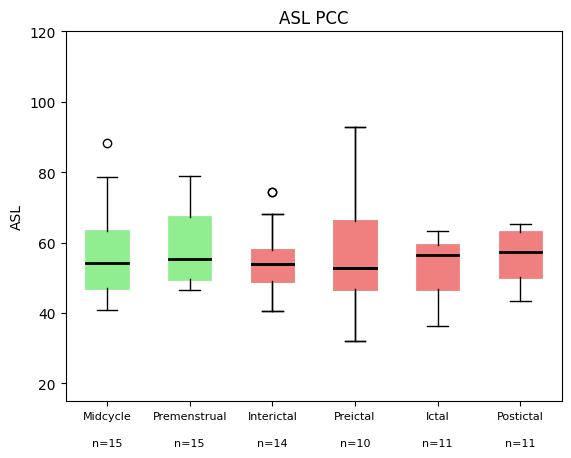

Midcycle vs Interictal for Insula: p-value = 0.45477
Premenstrual vs Preictal for Insula: p-value = 0.60818
Premenstrual vs Ictal for Insula: p-value = 0.12256
Premenstrual vs Postictal for Insula: p-value = 0.16881
Midcycle vs Premenstrual for Insula: p-value = 0.43162


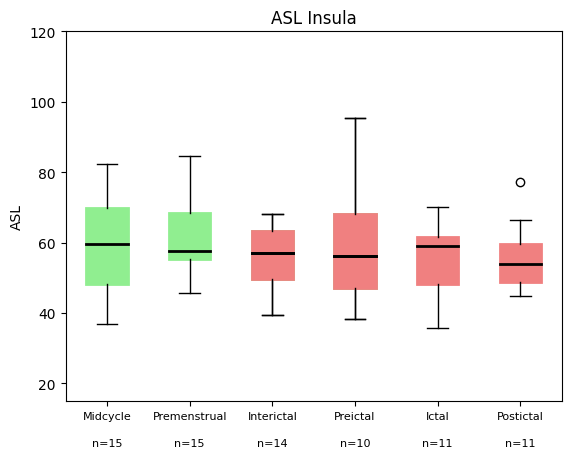

Midcycle vs Interictal for MFG: p-value = 0.26783
Premenstrual vs Preictal for MFG: p-value = 0.94593
Premenstrual vs Ictal for MFG: p-value = 0.04729
Premenstrual vs Postictal for MFG: p-value = 0.56898
Midcycle vs Premenstrual for MFG: p-value = 0.88813


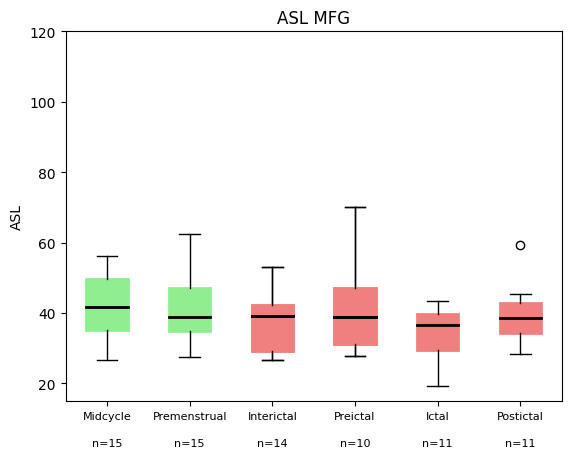

Midcycle vs Interictal for LG: p-value = 0.53821
Premenstrual vs Preictal for LG: p-value = 0.64367
Premenstrual vs Ictal for LG: p-value = 0.06015
Premenstrual vs Postictal for LG: p-value = 0.30947
Midcycle vs Premenstrual for LG: p-value = 0.19062


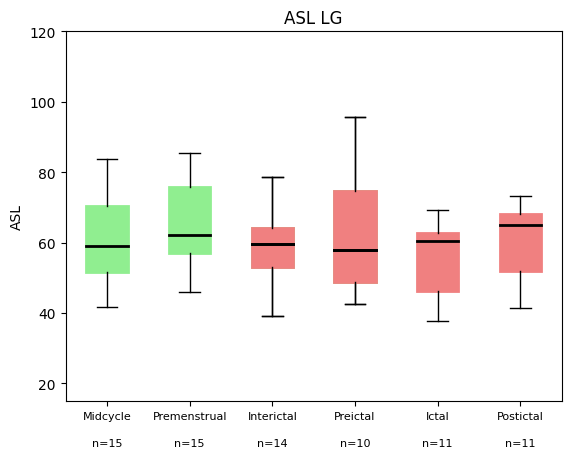

Midcycle vs Interictal for Cb (Welch): p-value = 0.34006
Premenstrual vs Preictal for Cb: p-value = 0.65043
Premenstrual vs Ictal for Cb: p-value = 0.09849
Premenstrual vs Postictal for Cb (Welch): p-value = 0.43543
Midcycle vs Premenstrual for Cb: p-value = 0.50627


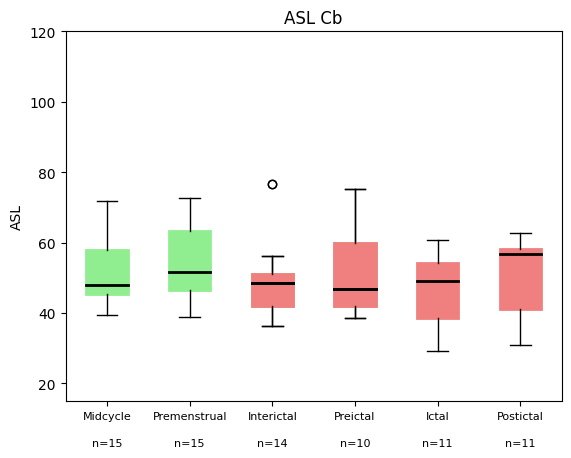

Midcycle vs Interictal for Ramyg: p-value = 0.29882
Premenstrual vs Preictal for Ramyg: p-value = 0.95624
Premenstrual vs Ictal for Ramyg: p-value = 0.04493
Premenstrual vs Postictal for Ramyg: p-value = 0.23690
Midcycle vs Premenstrual for Ramyg: p-value = 0.25869


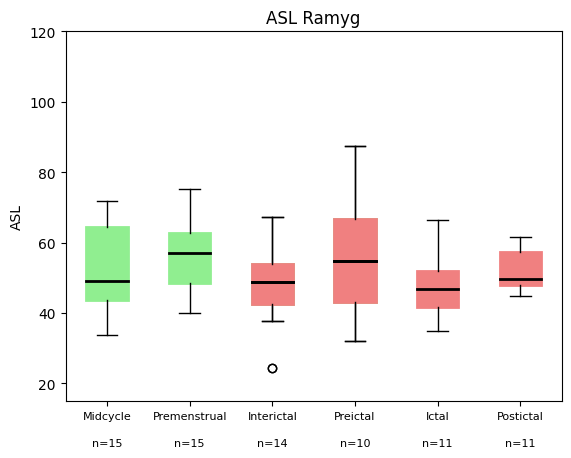

Midcycle vs Interictal for Lamyg: p-value = 0.11452
Premenstrual vs Preictal for Lamyg (Welch): p-value = 0.83161
Premenstrual vs Ictal for Lamyg (Welch): p-value = 0.18808
Premenstrual vs Postictal for Lamyg (Welch): p-value = 0.20897
Midcycle vs Premenstrual for Lamyg (Wilcoxon): p-value = 0.52448


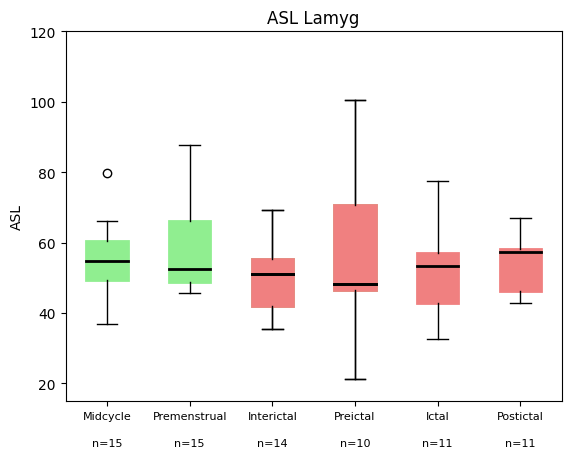

Midcycle vs Interictal for Rthal: p-value = 0.56688
Premenstrual vs Preictal for Rthal: p-value = 0.41966
Premenstrual vs Ictal for Rthal: p-value = 0.04706
Premenstrual vs Postictal for Rthal: p-value = 0.18886
Midcycle vs Premenstrual for Rthal: p-value = 0.11948


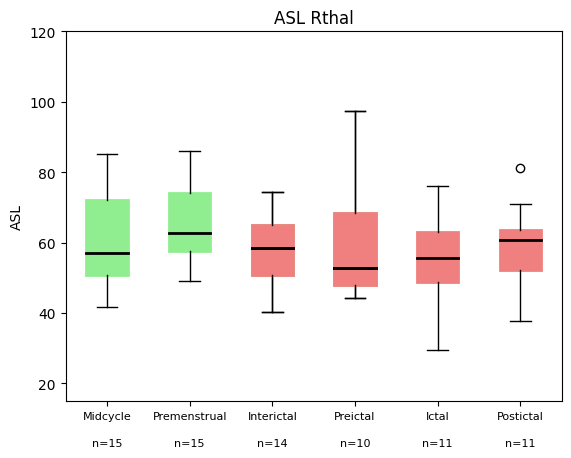

Midcycle vs Interictal for Lthal: p-value = 0.64995
Premenstrual vs Preictal for Lthal (Welch): p-value = 0.67015
Premenstrual vs Ictal for Lthal (Welch): p-value = 0.11452
Premenstrual vs Postictal for Lthal (Welch): p-value = 0.34508
Midcycle vs Premenstrual for Lthal (Wilcoxon): p-value = 0.35913


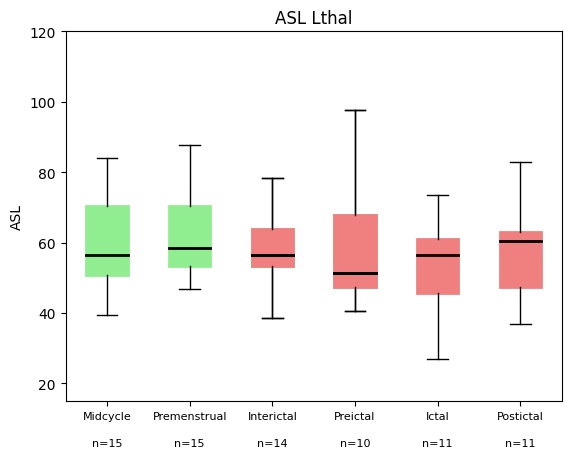

Midcycle vs Interictal for Brainstem (Welch): p-value = 0.95467
Premenstrual vs Preictal for Brainstem: p-value = 0.52691
Premenstrual vs Ictal for Brainstem: p-value = 0.09389
Premenstrual vs Postictal for Brainstem: p-value = 0.47430
Midcycle vs Premenstrual for Brainstem: p-value = 0.32224


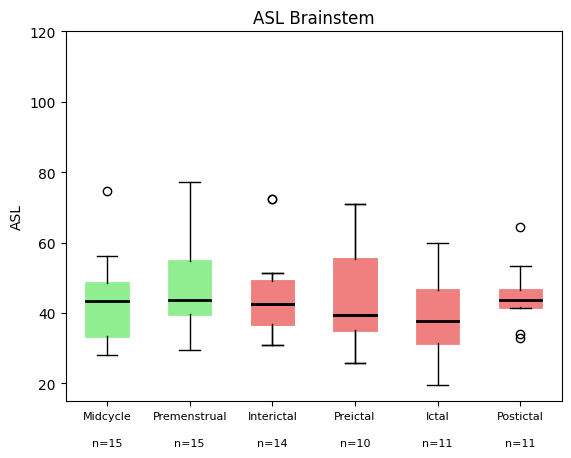

Midcycle vs Interictal for Rputamen: p-value = 0.34956
Premenstrual vs Preictal for Rputamen: p-value = 0.31388
Premenstrual vs Ictal for Rputamen: p-value = 0.02952
Premenstrual vs Postictal for Rputamen: p-value = 0.01478
Midcycle vs Premenstrual for Rputamen: p-value = 0.39275


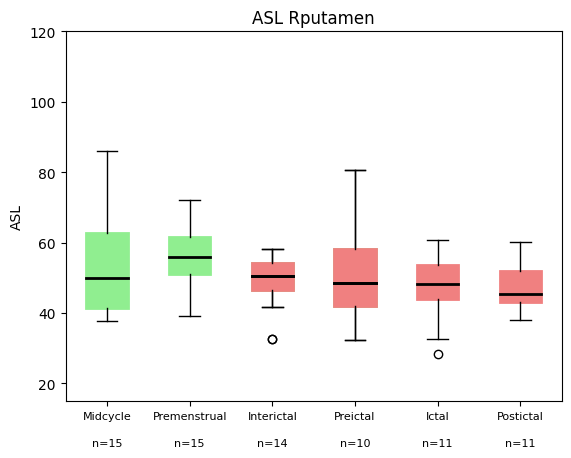

Midcycle vs Interictal for Lputamen: p-value = 0.29798
Premenstrual vs Preictal for Lputamen: p-value = 0.46112
Premenstrual vs Ictal for Lputamen: p-value = 0.26082
Premenstrual vs Postictal for Lputamen: p-value = 0.15734
Midcycle vs Premenstrual for Lputamen: p-value = 0.77064


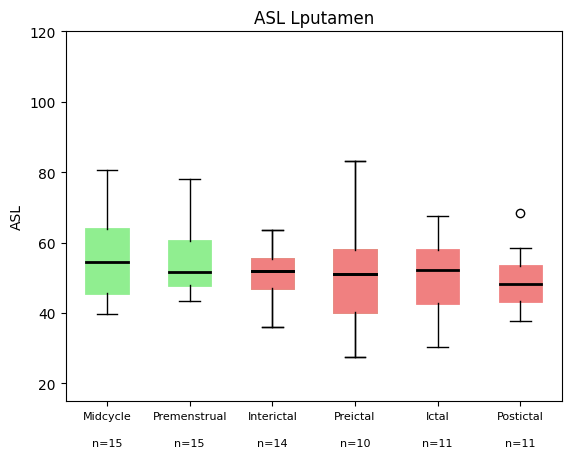

Midcycle vs Interictal for FG: p-value = 0.43861
Premenstrual vs Preictal for FG: p-value = 0.94369
Premenstrual vs Ictal for FG: p-value = 0.16149
Premenstrual vs Postictal for FG: p-value = 0.47267
Midcycle vs Premenstrual for FG: p-value = 0.47830


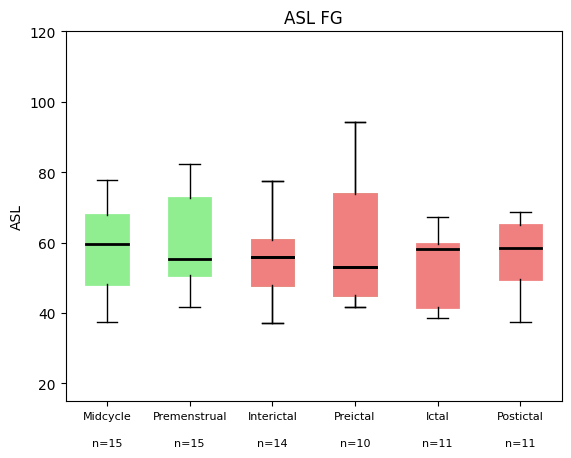

Midcycle vs Interictal for OIL: p-value = 0.27509
Premenstrual vs Preictal for OIL: p-value = 0.96185
Premenstrual vs Ictal for OIL: p-value = 0.37012
Premenstrual vs Postictal for OIL: p-value = 0.68213
Midcycle vs Premenstrual for OIL: p-value = 0.69529


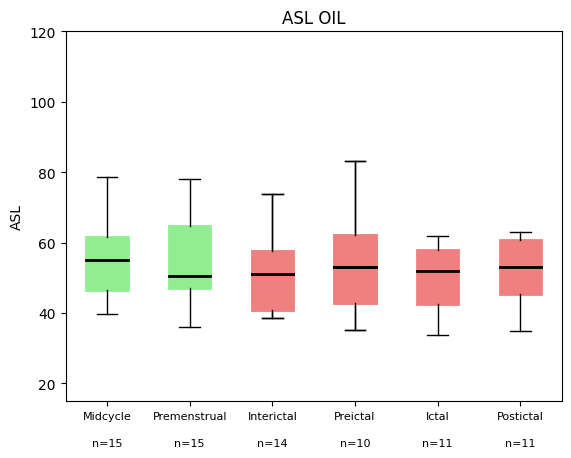

Midcycle vs Interictal for OIR: p-value = 0.62146
Premenstrual vs Preictal for OIR: p-value = 0.76498
Premenstrual vs Ictal for OIR: p-value = 0.20815
Premenstrual vs Postictal for OIR: p-value = 0.45591
Midcycle vs Premenstrual for OIR: p-value = 0.39131


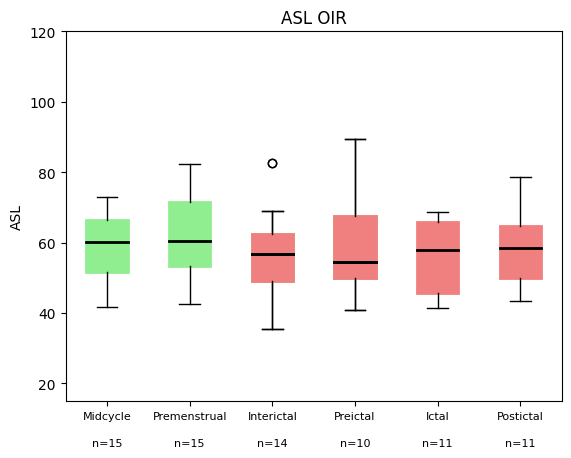

Midcycle vs Interictal for OML: p-value = 0.66247
Premenstrual vs Preictal for OML: p-value = 0.70373
Premenstrual vs Ictal for OML: p-value = 0.10578
Premenstrual vs Postictal for OML: p-value = 0.44808
Midcycle vs Premenstrual for OML: p-value = 0.20048


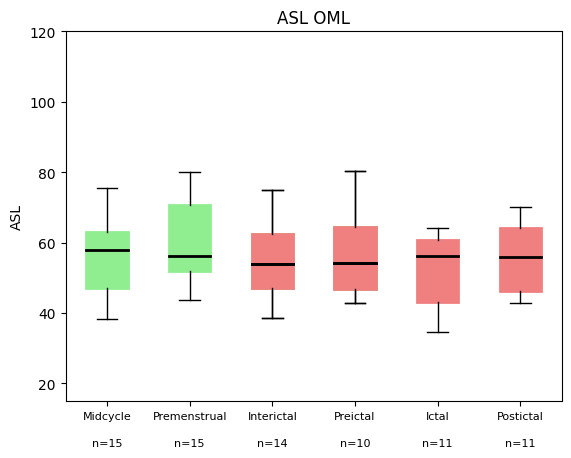

Midcycle vs Interictal for OMR: p-value = 0.63898
Premenstrual vs Preictal for OMR (Welch): p-value = 0.70058
Premenstrual vs Ictal for OMR: p-value = 0.11678
Premenstrual vs Postictal for OMR: p-value = 0.40767
Midcycle vs Premenstrual for OMR: p-value = 0.12936


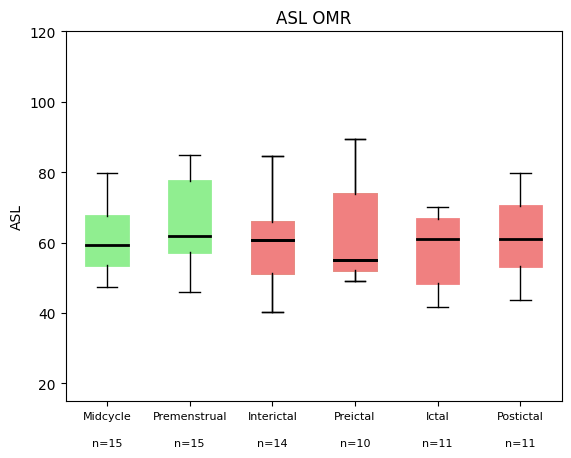

In [14]:
all_roisresults = []
for i in range(len(ROI_names)):
    data = [allROIsASL_mid[i],allROIsASL_premens[i],allROIsASL_int[i],allROIsASL_preict[i],allROIsASL_ict[i],allROIsASL_postict[i]]

    ttest_res = all_stats(data, ROI_names[i])

    all_roisresults += [ttest_res]


    plot_boxplot(data,ROI_names[i],"ASL")

In [15]:
print(all_roisresults)
print(len(all_roisresults))

[[0.6235294548118449, 0.4059072757661073, 0.03552464307605147, 0.1594351584246992, 0.39401901997027167], [0.2119040961172425, 0.9651694705134901, 0.13656261670500502, 0.23166278436525253, 0.5358240074202604], [0.4904438328928127, 0.9932764103998482, 0.10272804218163607, 0.40780639419745923, 0.4227565235797833], [0.27443015760816036, 0.49890496015917096, 0.07748188086300369, 0.18436814217415348, 0.8439143223288796], [0.21931190277604093, 0.6367703079748479, 0.09197668658652591, 0.27113493489125434, 0.905790643226502], [0.48104259080460265, 0.8641162260781523, 0.15129708207464232, 0.558220100096582, 0.6495948882166747], [0.45476783577674973, 0.6081767319442029, 0.12256239093348428, 0.1688105499865588, 0.43162246289339323], [0.2678349792692148, 0.9459271462349488, 0.047290707603109494, 0.5689823233247904, 0.8881297649024347], [0.53821055710282, 0.6436675735565314, 0.06014883586858786, 0.3094688292478308, 0.19061967897148893], [0.34006367741565324, 0.6504263430132851, 0.09848543338628402, 

## Multiple comparisons correction

In [16]:
midvintASL, premvpreASL, premvictASL, premvpostASL, midvpremASL = organize_pvaluesalt(all_roisresults)
print(midvintASL)
print(len(midvintASL))

[0.6235294548118449, 0.2119040961172425, 0.4904438328928127, 0.27443015760816036, 0.21931190277604093, 0.48104259080460265, 0.45476783577674973, 0.2678349792692148, 0.53821055710282, 0.34006367741565324, 0.2988222380189268, 0.11452487618113127, 0.5668761387668082, 0.649948919038378, 0.9546703133518573, 0.3495579995066834, 0.29797929504657716, 0.4386083207379222, 0.27509260957525217, 0.6214593318929147, 0.6624677625443454, 0.63897919980149]
22


Check which are significant before correction

In [17]:
sig_midvintASL = is_sig(midvintASL,ROI_names,"Midcycle vs Interictal")
sig_premvpreASL = is_sig(premvpreASL,ROI_names,"Premenstrual vs Preictal")
sig_premvictASL = is_sig(premvictASL, ROI_names, "Premenstrual vs Ictal")
sig_premvpostASL = is_sig(premvpostASL,ROI_names,"Premenstrual vs Postictal")
sig_midvpremASL = is_sig(midvpremASL,ROI_names,"Midcycle vs Premenstrual")

Premenstrual vs Ictal is significant in Hypothalamus
Premenstrual vs Ictal is significant in MFG
Premenstrual vs Ictal is significant in Ramyg
Premenstrual vs Ictal is significant in Rthal
Premenstrual vs Ictal is significant in Rputamen
Premenstrual vs Postictal is significant in Rputamen


1st Level Correction (n is the number of ROIs)

In [18]:
# fdr

checkmidvintASL = multipletests(midvintASL,method='fdr_bh')
checkpremvpreASL = multipletests(premvpreASL, method='fdr_bh')
checkpremvictASL = multipletests(premvictASL,method='fdr_bh')
checkpremvpostASL = multipletests(premvpostASL, method='fdr_bh')
checkmidvpremASL = multipletests(midvpremASL,method='fdr_bh')

# check if any remain significant

corr_sigmidvintASL = is_sig(checkmidvintASL[1],ROI_names,"Midcycle vs Premenstrual")
corr_sigpremvpre = is_sig(checkpremvpreASL[1],ROI_names,"Premenstrual vs Preictal")
corr_sigpremvictASL = is_sig(checkpremvictASL[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostASL = is_sig(checkpremvpostASL[1],ROI_names,"Premenstrual vs Postictal")
corr_sigmidvpremASL = is_sig(checkmidvpremASL[1],ROI_names,"Midcycle vs Premenstrual")

In [19]:
# same but with bonferroni

checkmidvintASL = multipletests(midvintASL, method='bonferroni')
checkpremvpreASL = multipletests(premvpreASL, method='bonferroni')
checkpremvictASL = multipletests(premvictASL, method='bonferroni')
checkpremvpostASL = multipletests(premvpostASL, method='bonferroni')
checkmidvpremASL = multipletests(midvpremASL, method='bonferroni')

corr_sigmidvintASL = is_sig(checkmidvintASL[1], ROI_names, "Midcycle vs Premenstrual")
corr_sigpremvpreASL = is_sig(checkpremvpreASL[1], ROI_names, "Premenstrual vs Preictal")
corr_sigpremvictASL = is_sig(checkpremvictASL[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostASL = is_sig(checkpremvpostASL[1], ROI_names, "Premenstrual vs Postictal")
corr_sigmidvpremASL = is_sig(checkmidvpremASL[1], ROI_names, "Midcycle vs Premenstrual")


None remain signficant after correction

# CVR

In [20]:
allROIsCVR_mid = roi_vasc(CVRcontrols_midcycle,"ses-midcycle","CVR")
allROIsCVR_premens = roi_vasc(CVRcontrols_premens,"ses-premenstrual","CVR")
allROIsCVR_int = roi_vasc(patientsCVR_interictal,"ses-interictal","CVR")
allROIsCVR_preict = roi_vasc(patientsCVR_preictal,"ses-preictal","CVR")
allROIsCVR_ict = roi_vasc(patientsCVR_ictal,"ses-ictal","CVR")
allROIsCVR_postict = roi_vasc(patientsCVR_postictal,"ses-postictal","CVR")

## Check normality

In [21]:
mid_normCVR = norm_test(allROIsCVR_mid,ROI_names,"midcycle")
print('-'*10)
premens_normCVR = norm_test(allROIsCVR_premens,ROI_names,"premenstrual")
print('-'*10)
int_normCVR = norm_test(allROIsCVR_int,ROI_names,"interictal")
print('-'*10)
preict_normCVR = norm_test(allROIsCVR_preict,ROI_names,"preictal")
print('-'*10)
ict_normCVR = norm_test(allROIsCVR_ict,ROI_names,"ictal")
print('-'*10)
postict_normCVR = norm_test(allROIsCVR_postict,ROI_names,"postictal")

ROI Hypothalamus session midcycle does not have normal distribution
ROI pPHG session midcycle does not have normal distribution
ROI ACC session midcycle does not have normal distribution
ROI MCC session midcycle does not have normal distribution
ROI PCC session midcycle does not have normal distribution
ROI MFG session midcycle does not have normal distribution
ROI Cb session midcycle does not have normal distribution
ROI Lamyg session midcycle does not have normal distribution
ROI Lthal session midcycle does not have normal distribution
ROI Rputamen session midcycle does not have normal distribution
ROI Lputamen session midcycle does not have normal distribution
ROI OML session midcycle does not have normal distribution
----------
ROI MCC session premenstrual does not have normal distribution
ROI Ramyg session premenstrual does not have normal distribution
ROI Lamyg session premenstrual does not have normal distribution
ROI Rthal session premenstrual does not have normal distribution


## Results + stats

Midcycle vs Interictal for Hypothalamus (Welch): p-value = 0.19404
Premenstrual vs Preictal for Hypothalamus (Welch): p-value = 0.02985
Premenstrual vs Ictal for Hypothalamus (Welch): p-value = 0.54337
Premenstrual vs Postictal for Hypothalamus: p-value = 0.35861
Midcycle vs Premenstrual for Hypothalamus (Welch): p-value = 0.38660


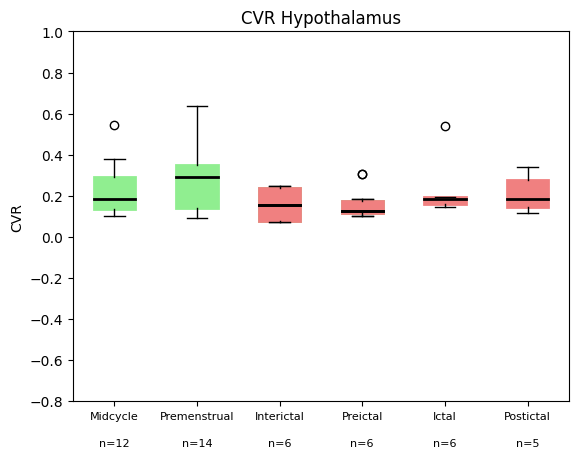

Midcycle vs Interictal for aPHG: p-value = 0.08262
Premenstrual vs Preictal for aPHG (Welch): p-value = 0.01774
Premenstrual vs Ictal for aPHG (Welch): p-value = 0.25647
Premenstrual vs Postictal for aPHG: p-value = 0.35916
Midcycle vs Premenstrual for aPHG: p-value = 0.38933


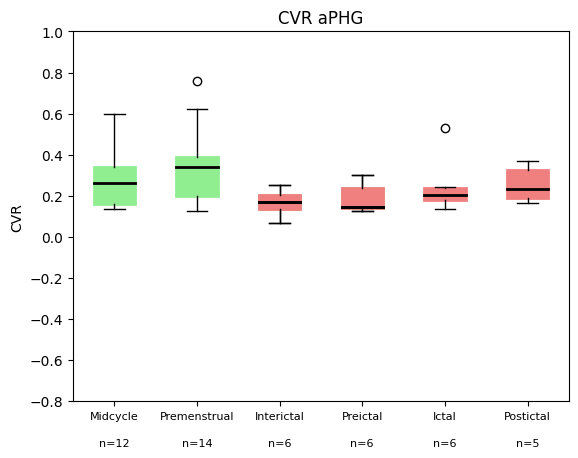

Midcycle vs Interictal for pPHG (Welch): p-value = 0.06172
Premenstrual vs Preictal for pPHG: p-value = 0.08449
Premenstrual vs Ictal for pPHG: p-value = 0.27606
Premenstrual vs Postictal for pPHG: p-value = 0.38372
Midcycle vs Premenstrual for pPHG (Welch): p-value = 0.43919


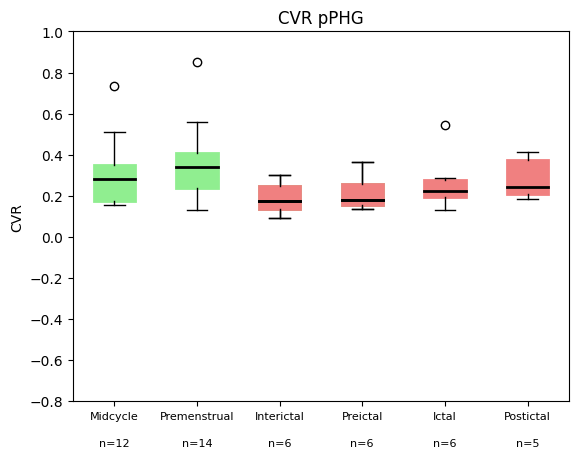

Midcycle vs Interictal for ACC (Welch): p-value = 0.31454
Premenstrual vs Preictal for ACC: p-value = 0.09593
Premenstrual vs Ictal for ACC: p-value = 0.35943
Premenstrual vs Postictal for ACC: p-value = 0.45493
Midcycle vs Premenstrual for ACC (Welch): p-value = 0.31313


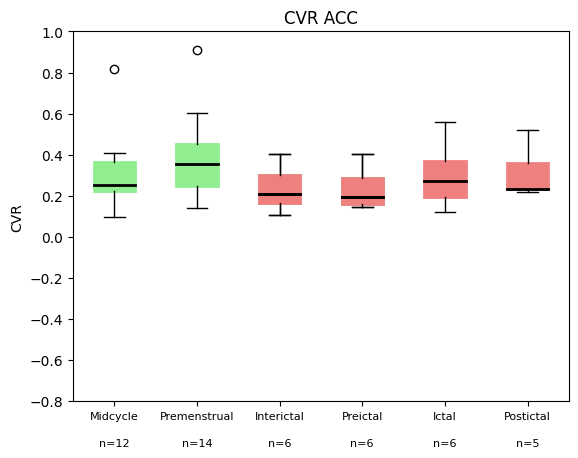

Midcycle vs Interictal for MCC (Welch): p-value = 0.09851
Premenstrual vs Preictal for MCC (Welch): p-value = 0.03896
Premenstrual vs Ictal for MCC (Welch): p-value = 0.29891
Premenstrual vs Postictal for MCC (Welch): p-value = 0.31679
Midcycle vs Premenstrual for MCC (Welch): p-value = 0.42157


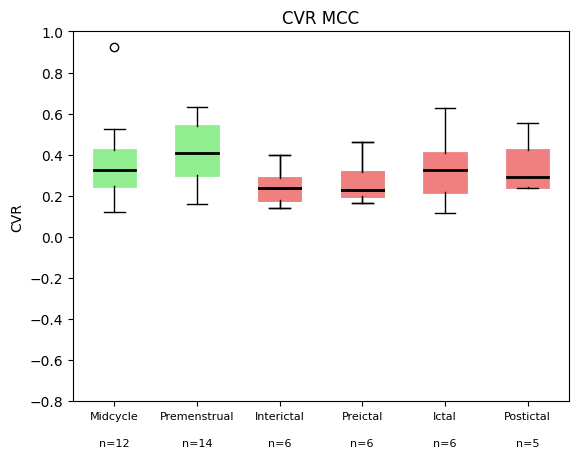

Midcycle vs Interictal for PCC (Welch): p-value = 0.16391
Premenstrual vs Preictal for PCC: p-value = 0.11350
Premenstrual vs Ictal for PCC: p-value = 0.41181
Premenstrual vs Postictal for PCC: p-value = 0.51149
Midcycle vs Premenstrual for PCC (Welch): p-value = 0.77606


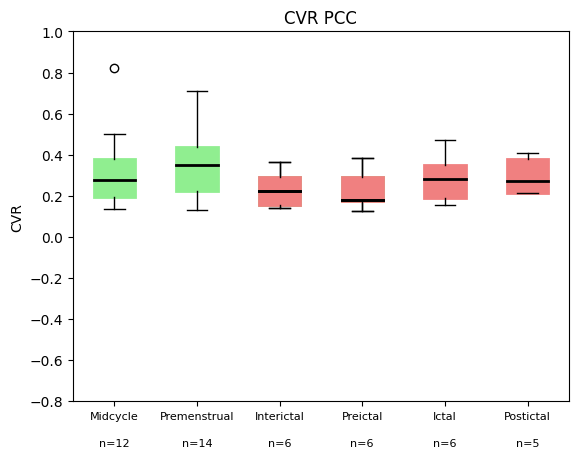

Midcycle vs Interictal for Insula: p-value = 0.14535
Premenstrual vs Preictal for Insula (Welch): p-value = 0.04994
Premenstrual vs Ictal for Insula: p-value = 0.29418
Premenstrual vs Postictal for Insula: p-value = 0.42057
Midcycle vs Premenstrual for Insula: p-value = 0.46114


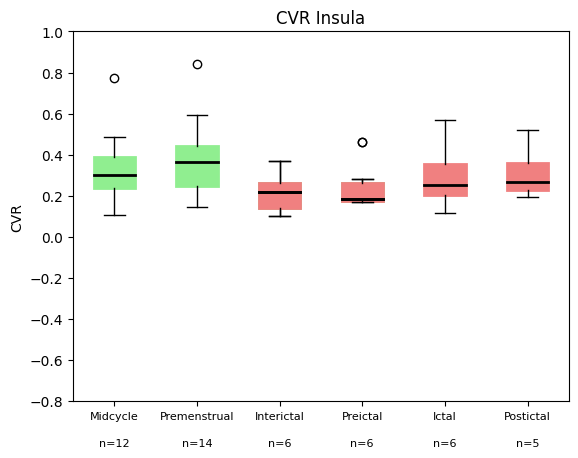

Midcycle vs Interictal for MFG (Welch): p-value = 0.09258
Premenstrual vs Preictal for MFG: p-value = 0.08433
Premenstrual vs Ictal for MFG: p-value = 0.27251
Premenstrual vs Postictal for MFG: p-value = 0.35936
Midcycle vs Premenstrual for MFG (Welch): p-value = 0.48970


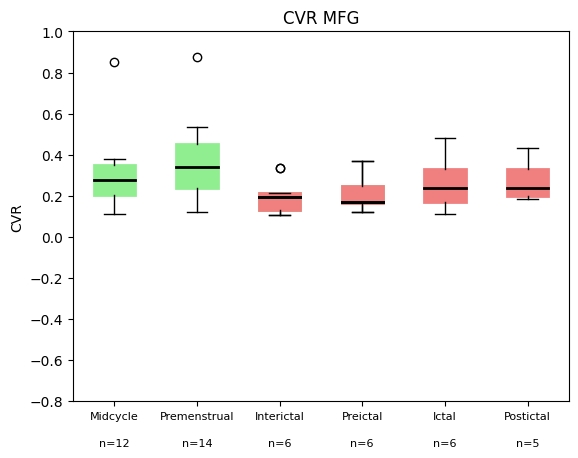

Midcycle vs Interictal for LG: p-value = 0.11833
Premenstrual vs Preictal for LG: p-value = 0.08570
Premenstrual vs Ictal for LG: p-value = 0.34152
Premenstrual vs Postictal for LG: p-value = 0.45422
Midcycle vs Premenstrual for LG: p-value = 0.38277


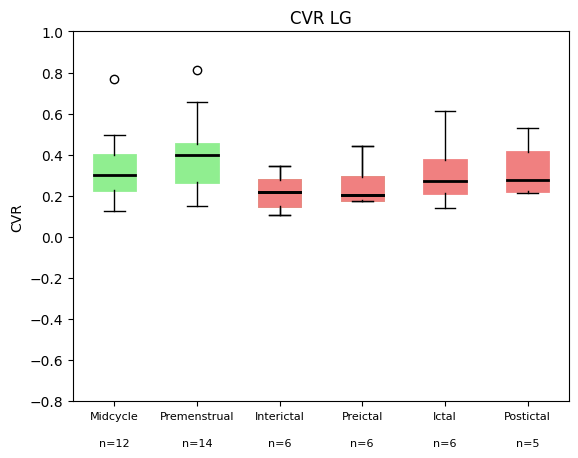

Midcycle vs Interictal for Cb (Welch): p-value = 0.05015
Premenstrual vs Preictal for Cb: p-value = 0.07072
Premenstrual vs Ictal for Cb: p-value = 0.25641
Premenstrual vs Postictal for Cb: p-value = 0.40070
Midcycle vs Premenstrual for Cb (Welch): p-value = 0.52129


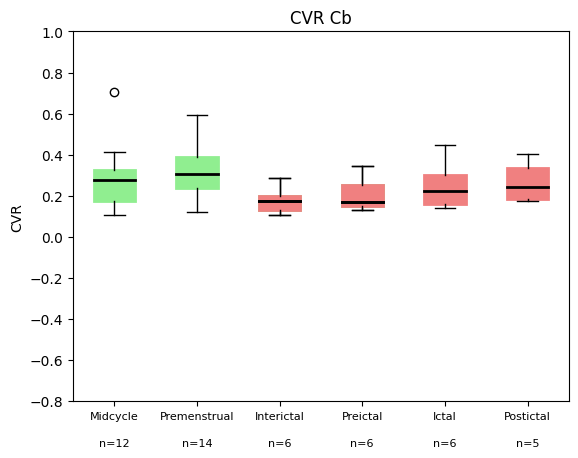

Midcycle vs Interictal for Ramyg: p-value = 0.17784
Premenstrual vs Preictal for Ramyg (Welch): p-value = 0.01522
Premenstrual vs Ictal for Ramyg (Welch): p-value = 0.51035
Premenstrual vs Postictal for Ramyg (Welch): p-value = 0.40192
Midcycle vs Premenstrual for Ramyg (Welch): p-value = 0.50745


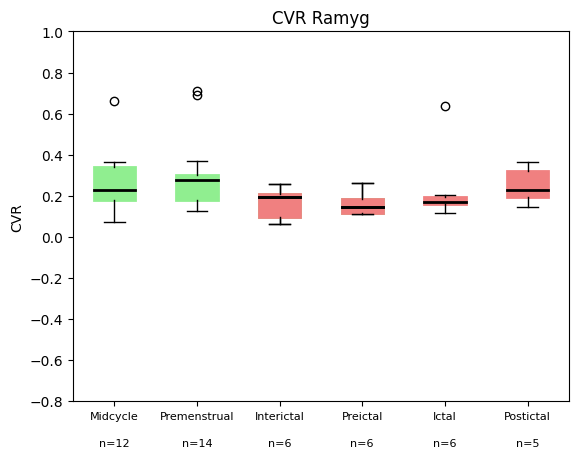

Midcycle vs Interictal for Lamyg (Welch): p-value = 0.07135
Premenstrual vs Preictal for Lamyg (Welch): p-value = 0.03708
Premenstrual vs Ictal for Lamyg (Welch): p-value = 0.60524
Premenstrual vs Postictal for Lamyg (Welch): p-value = 0.37775
Midcycle vs Premenstrual for Lamyg (Welch): p-value = 0.57794


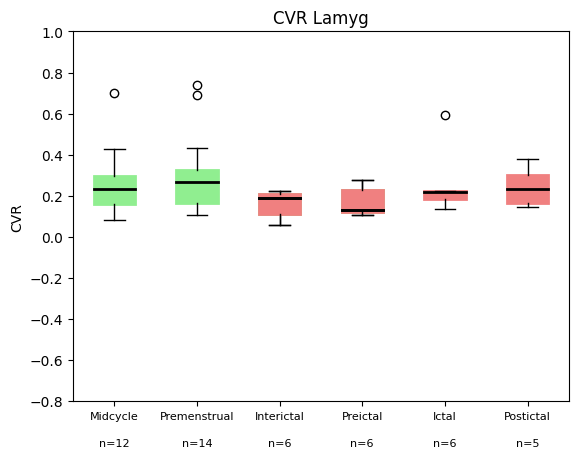

Midcycle vs Interictal for Rthal: p-value = 0.15424
Premenstrual vs Preictal for Rthal (Welch): p-value = 0.06536
Premenstrual vs Ictal for Rthal (Welch): p-value = 0.22326
Premenstrual vs Postictal for Rthal (Welch): p-value = 0.33453
Midcycle vs Premenstrual for Rthal (Welch): p-value = 0.60163


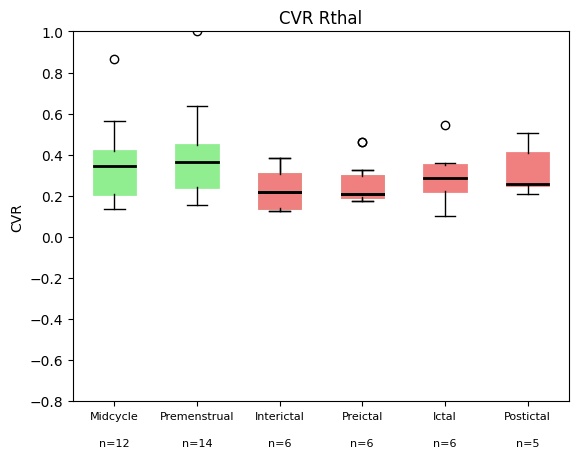

Midcycle vs Interictal for Lthal (Welch): p-value = 0.07791
Premenstrual vs Preictal for Lthal (Welch): p-value = 0.05605
Premenstrual vs Ictal for Lthal (Welch): p-value = 0.31411
Premenstrual vs Postictal for Lthal (Welch): p-value = 0.41596
Midcycle vs Premenstrual for Lthal (Welch): p-value = 0.66575


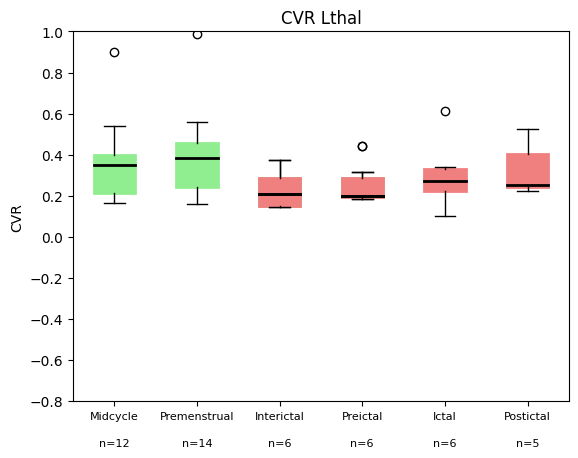

Midcycle vs Interictal for Brainstem: p-value = 0.10356
Premenstrual vs Preictal for Brainstem (Welch): p-value = 0.07177
Premenstrual vs Ictal for Brainstem (Welch): p-value = 0.37189
Premenstrual vs Postictal for Brainstem (Welch): p-value = 0.43545
Midcycle vs Premenstrual for Brainstem (Welch): p-value = 0.53703


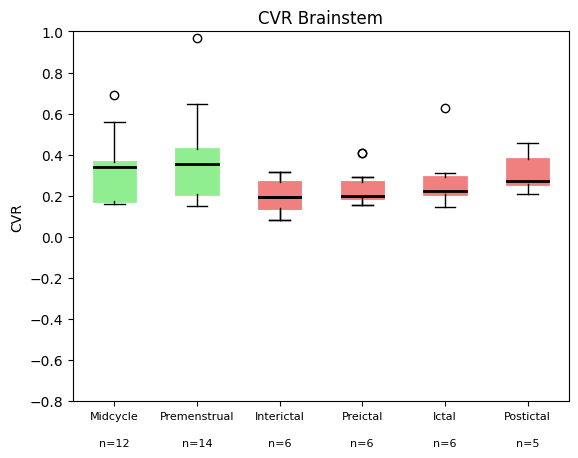

Midcycle vs Interictal for Rputamen (Welch): p-value = 0.08662
Premenstrual vs Preictal for Rputamen: p-value = 0.03654
Premenstrual vs Ictal for Rputamen: p-value = 0.26483
Premenstrual vs Postictal for Rputamen: p-value = 0.34130
Midcycle vs Premenstrual for Rputamen (Welch): p-value = 0.48809


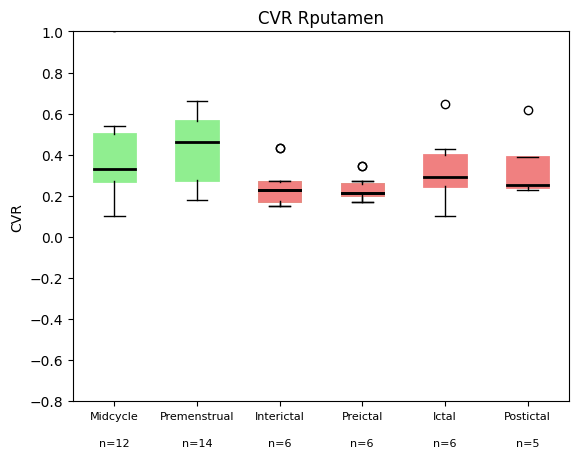

Midcycle vs Interictal for Lputamen (Welch): p-value = 0.09584
Premenstrual vs Preictal for Lputamen (Welch): p-value = 0.00568
Premenstrual vs Ictal for Lputamen: p-value = 0.21321
Premenstrual vs Postictal for Lputamen: p-value = 0.53231
Midcycle vs Premenstrual for Lputamen (Welch): p-value = 0.46794


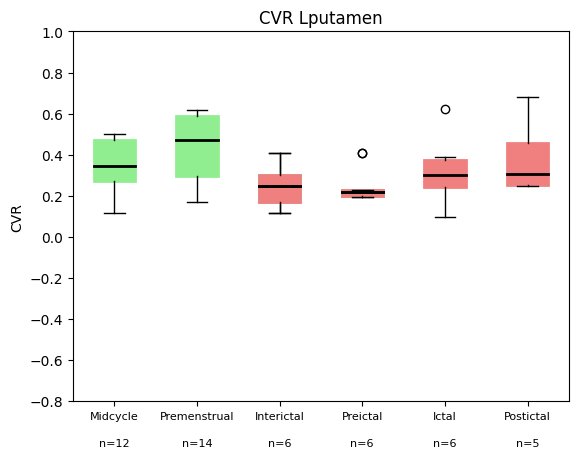

Midcycle vs Interictal for FG: p-value = 0.12788
Premenstrual vs Preictal for FG: p-value = 0.06166
Premenstrual vs Ictal for FG: p-value = 0.22333
Premenstrual vs Postictal for FG: p-value = 0.37367
Midcycle vs Premenstrual for FG: p-value = 0.42259


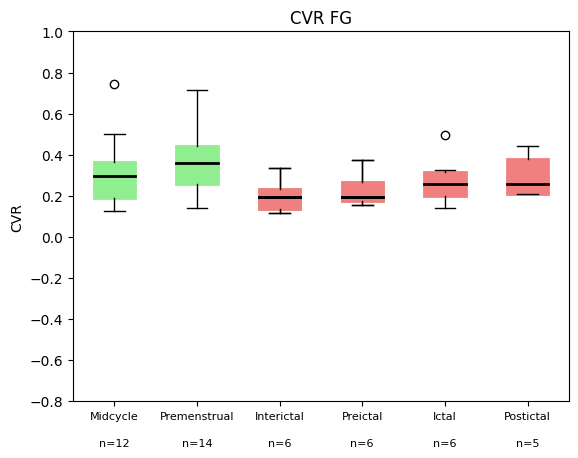

Midcycle vs Interictal for OIL: p-value = 0.15721
Premenstrual vs Preictal for OIL: p-value = 0.09961
Premenstrual vs Ictal for OIL: p-value = 0.43453
Premenstrual vs Postictal for OIL: p-value = 0.31594
Midcycle vs Premenstrual for OIL: p-value = 0.33818


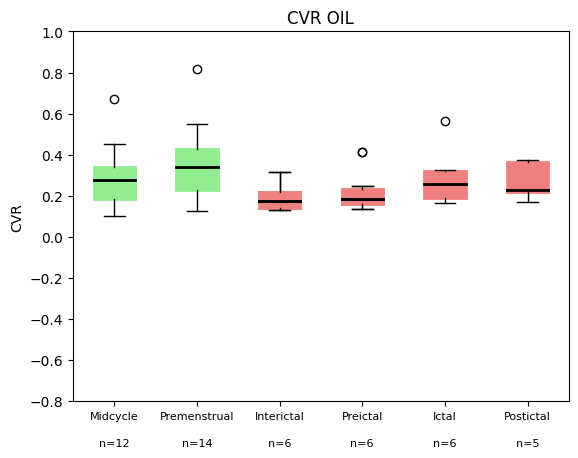

Midcycle vs Interictal for OIR: p-value = 0.23709
Premenstrual vs Preictal for OIR (Welch): p-value = 0.08317
Premenstrual vs Ictal for OIR: p-value = 0.39222
Premenstrual vs Postictal for OIR: p-value = 0.58427
Midcycle vs Premenstrual for OIR: p-value = 0.41062


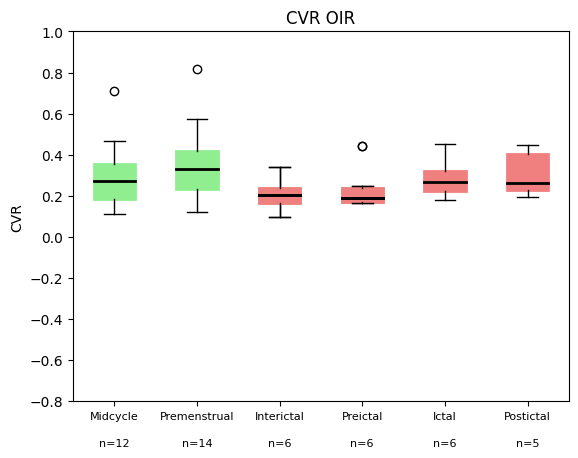

Midcycle vs Interictal for OML (Welch): p-value = 0.11920
Premenstrual vs Preictal for OML: p-value = 0.07909
Premenstrual vs Ictal for OML: p-value = 0.28961
Premenstrual vs Postictal for OML: p-value = 0.29159
Midcycle vs Premenstrual for OML (Welch): p-value = 0.36946


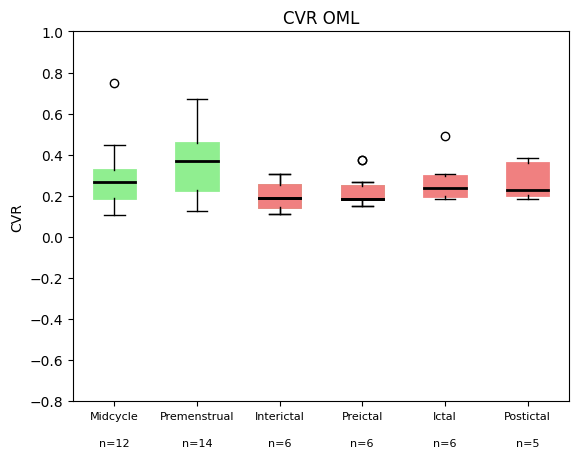

Midcycle vs Interictal for OMR: p-value = 0.24308
Premenstrual vs Preictal for OMR (Welch): p-value = 0.07610
Premenstrual vs Ictal for OMR: p-value = 0.24502
Premenstrual vs Postictal for OMR: p-value = 0.46925
Midcycle vs Premenstrual for OMR: p-value = 0.30012


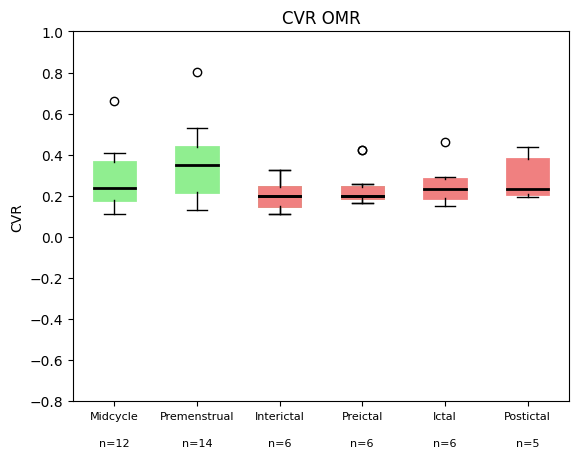

In [22]:
all_roisresultsCVR = []
for i in range(len(ROI_names)):
    data = [allROIsCVR_mid[i],allROIsCVR_premens[i],allROIsCVR_int[i],allROIsCVR_preict[i],allROIsCVR_ict[i],allROIsCVR_postict[i]]

    ttest_res = all_statsCVR(data,ROI_names[i])

    all_roisresultsCVR += [ttest_res]

    plot_boxplot(data,ROI_names[i],"CVR")

## Multiple Comparisons Correction

In [23]:
midvintCVR, premvpreCVR, premvictCVR, premvpostCVR, midvpremCVR = organize_pvaluesalt(all_roisresultsCVR)
print(len(all_roisresultsCVR))


22


In [24]:
sig_midvintCVR = is_sig(midvintCVR,ROI_names,"Midcycle vs Interictal")
sig_premvpreCVR = is_sig(premvpreCVR,ROI_names,"Premenstrual vs Preictal")
sig_premvictCVR = is_sig(premvictCVR, ROI_names, "Premenstrual vs Ictal")
sig_premvpostCVR = is_sig(premvpostCVR,ROI_names,"Premenstrual vs Postictal")
sig_midvpremCVR = is_sig(midvpremCVR,ROI_names,"Midcycle vs Premenstrual")

Premenstrual vs Preictal is significant in Hypothalamus
Premenstrual vs Preictal is significant in aPHG
Premenstrual vs Preictal is significant in MCC
Premenstrual vs Preictal is significant in Insula
Premenstrual vs Preictal is significant in Ramyg
Premenstrual vs Preictal is significant in Lamyg
Premenstrual vs Preictal is significant in Rputamen
Premenstrual vs Preictal is significant in Lputamen


In [25]:
# fdr

checkmidvintCVR = multipletests(midvintCVR, method='fdr_bh')
checkpremvpreCVR = multipletests(premvpreCVR, method='fdr_bh')
checkpremvictCVR = multipletests(premvictCVR, method='fdr_bh')
checkpremvpostCVR = multipletests(premvpostCVR, method='fdr_bh')
checkmidvpremCVR = multipletests(midvpremCVR, method='fdr_bh')

# check if any remain significant

corr_sigmidvintCVR = is_sig(checkmidvintCVR[1], ROI_names, "Midcycle vs Premenstrual")
corr_sigpremvpreCVR = is_sig(checkpremvpreCVR[1], ROI_names, "Premenstrual vs Preictal")
corr_sigpremvictCVR = is_sig(checkpremvictCVR[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostCVR = is_sig(checkpremvpostCVR[1], ROI_names, "Premenstrual vs Postictal")
corr_sigmidvpremCVR = is_sig(checkmidvpremCVR[1], ROI_names, "Midcycle vs Premenstrual")


In [26]:
print(len(premvpreCVR)==len(checkpremvpreCVR[1]))

True


In [27]:
# with bonferroni

checkmidvintCVR = multipletests(midvintCVR, method='bonferroni')
checkpremvpreCVR = multipletests(premvpreCVR, method='bonferroni')
checkpremvictCVR = multipletests(premvictCVR, method='bonferroni')
checkpremvpostCVR = multipletests(premvpostCVR, method='bonferroni')
checkmidvpremCVR = multipletests(midvpremCVR, method='bonferroni')

# check if any remain significant

corr_sigmidvintCVR = is_sig(checkmidvintCVR[1], ROI_names, "Midcycle vs Premenstrual")
corr_sigpremvpreCVR = is_sig(checkpremvpreCVR[1], ROI_names, "Premenstrual vs Preictal")
corr_sigpremvictCVR = is_sig(checkpremvictCVR[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostCVR = is_sig(checkpremvpostCVR[1], ROI_names, "Premenstrual vs Postictal")
corr_sigmidvpremCVR = is_sig(checkmidvpremCVR[1], ROI_names, "Midcycle vs Premenstrual")


# Final graphs

In [28]:
print(ROI_names)

['Hypothalamus', 'aPHG', 'pPHG', 'ACC', 'MCC', 'PCC', 'Insula', 'MFG', 'LG', 'Cb', 'Ramyg', 'Lamyg', 'Rthal', 'Lthal', 'Brainstem', 'Rputamen', 'Lputamen', 'FG', 'OIL', 'OIR', 'OML', 'OMR']


In [29]:
ROI_names[12]

'Rthal'

## ASL

### Significant ROIs

In [30]:
ASLsig_mid = [allROIsASL_mid[0],allROIsASL_mid[7],allROIsASL_mid[10],allROIsASL_mid[12],allROIsASL_mid[15]]
ASLsig_premens = [allROIsASL_premens[0],allROIsASL_premens[7],allROIsASL_premens[10],allROIsASL_premens[12],allROIsASL_premens[15]]
ASLsig_int = [allROIsASL_int[0], allROIsASL_int[7], allROIsASL_int[10],allROIsASL_int[12], allROIsASL_int[15]]
ASLsig_preict = [allROIsASL_preict[0], allROIsASL_preict[7], allROIsASL_preict[10],allROIsASL_preict[12], allROIsASL_preict[15]]
ASLsig_ict = [allROIsASL_ict[0], allROIsASL_ict[7], allROIsASL_ict[10],allROIsASL_ict[12], allROIsASL_ict[15]]
ASLsig_postict = [allROIsASL_postict[0], allROIsASL_postict[7], allROIsASL_postict[10],allROIsASL_postict[12], allROIsASL_postict[15]]

In [31]:
print(len(ASLsig_postict[0]) == len(ASLsig_postict[1]) == len(ASLsig_postict[2]) == len(ASLsig_postict[3]) == len(ASLsig_postict[4]))

True


In [32]:
formatdata = pd.DataFrame({
    'Phase': (['Post-ovulation'] * (len(ASLsig_mid[0]) + len(ASLsig_mid[1]) + len(ASLsig_mid[2]) + len(ASLsig_mid[3]) + len(ASLsig_mid[4]))) +
             (['Peri-menstrual'] * (len(ASLsig_premens[0]) + len(ASLsig_premens[1]) + len(ASLsig_premens[2]) + len(ASLsig_premens[3]) + len(ASLsig_premens[4]))) +
             (['Interictal'] * (len(ASLsig_int[0]) + len(ASLsig_int[1]) + len(ASLsig_int[2]) + len(ASLsig_int[3]) + len(ASLsig_int[4]))) +
             (['Preictal'] * (len(ASLsig_preict[0]) + len(ASLsig_preict[1]) + len(ASLsig_preict[2]) + len(ASLsig_preict[3]) + len(ASLsig_preict[4]))) +
             (['Ictal'] * (len(ASLsig_ict[0]) + len(ASLsig_ict[1]) + len(ASLsig_ict[2]) + len(ASLsig_ict[3]) + len(ASLsig_ict[4]))) +
             (['Postictal'] * (len(ASLsig_postict[0]) + len(ASLsig_postict[1]) + len(ASLsig_postict[2]) + len(ASLsig_postict[3]) + len(ASLsig_postict[4]))),
    'ROI': (['Hth'] * len(ASLsig_mid[0]) + ['MFG'] * len(ASLsig_mid[1]) + ['rAmyg'] * len(ASLsig_mid[2]) + ['rThal'] * len(ASLsig_mid[3]) + ['rPutamen'] * len(ASLsig_mid[4])) +
           (['Hth'] * len(ASLsig_premens[0]) + ['MFG'] * len(ASLsig_premens[1]) + ['rAmyg'] * len(ASLsig_premens[2]) + ['rThal'] * len(ASLsig_premens[3]) + ['rPutamen'] * len(ASLsig_premens[4])) +
           (['Hth'] * len(ASLsig_int[0]) + ['MFG'] * len(ASLsig_int[1]) + ['rAmyg'] * len(ASLsig_int[2]) + ['rThal'] * len(ASLsig_int[3]) + ['rPutamen'] * len(ASLsig_int[4])) +
           (['Hth'] * len(ASLsig_preict[0]) + ['MFG'] * len(ASLsig_preict[1]) + ['rAmyg'] * len(ASLsig_preict[2]) + ['rThal'] * len(ASLsig_preict[3]) + ['rPutamen'] * len(ASLsig_preict[4])) +
           (['Hth'] * len(ASLsig_ict[0]) + ['MFG'] * len(ASLsig_ict[1]) + ['rAmyg'] * len(ASLsig_ict[2]) + ['rThal'] * len(ASLsig_ict[3]) + ['rPutamen'] * len(ASLsig_ict[4])) +
           (['Hth'] * len(ASLsig_postict[0]) + ['MFG'] * len(ASLsig_postict[1]) + ['rAmyg'] * len(ASLsig_postict[2]) + ['rThal'] * len(ASLsig_postict[3]) + ['rPutamen'] * len(ASLsig_postict[4])),
    'Mean % Signal Change': (ASLsig_mid[0] + ASLsig_mid[1] + ASLsig_mid[2] + ASLsig_mid[3] + ASLsig_mid[4]) +
                            (ASLsig_premens[0] + ASLsig_premens[1] + ASLsig_premens[2] + ASLsig_premens[3] + ASLsig_premens[4]) +
                            (ASLsig_int[0] + ASLsig_int[1] + ASLsig_int[2] + ASLsig_int[3] + ASLsig_int[4]) +
                            (ASLsig_preict[0] + ASLsig_preict[1] + ASLsig_preict[2] + ASLsig_preict[3] + ASLsig_preict[4]) +
                            (ASLsig_ict[0] + ASLsig_ict[1] + ASLsig_ict[2] + ASLsig_ict[3] + ASLsig_ict[4]) +
                            (ASLsig_postict[0] + ASLsig_postict[1] + ASLsig_postict[2] + ASLsig_postict[3] + ASLsig_postict[4])
})

In [33]:
formatdata.head(10)

,Phase,ROI,Mean % Signal Change
0,Post-ovulation,Hth,68.630774
1,Post-ovulation,Hth,42.340641
2,Post-ovulation,Hth,53.332795
3,Post-ovulation,Hth,70.689662
4,Post-ovulation,Hth,83.274727
5,Post-ovulation,Hth,73.309266
6,Post-ovulation,Hth,64.712384
7,Post-ovulation,Hth,63.162587
8,Post-ovulation,Hth,32.815384
9,Post-ovulation,Hth,38.064838


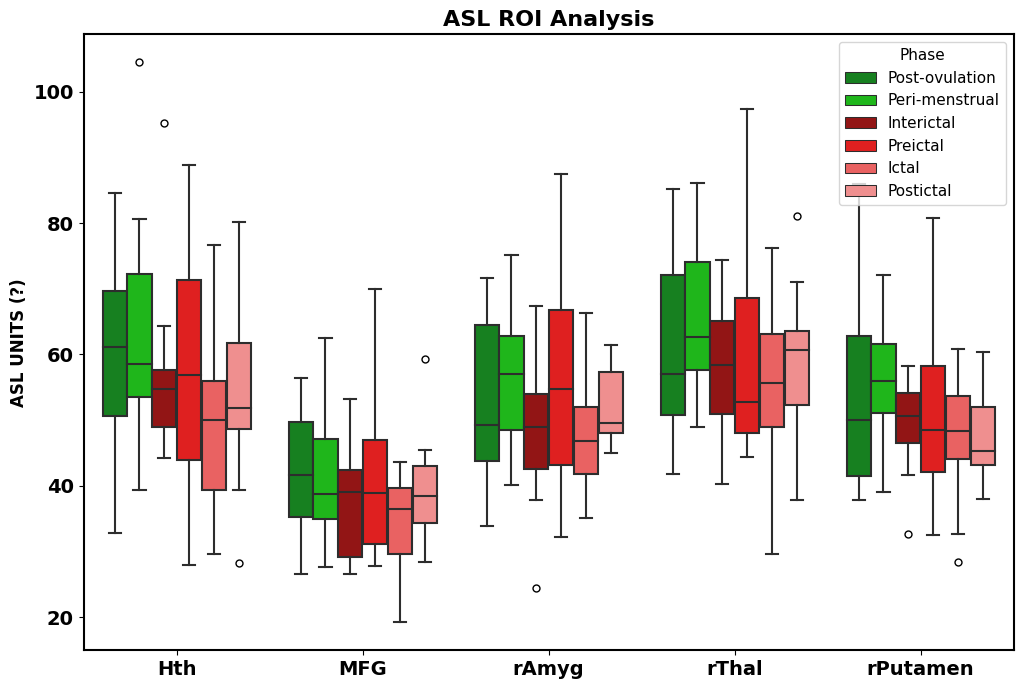

In [34]:
costum_palette = sns.color_palette(["#059212","#06D001",
                                    "#a70000", "#ff0000", "#ff4c4c", "#ff7f7f"])
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5)
plt.figure(figsize=(12, 8))
sns.boxplot(data=formatdata, x='ROI', y='Mean % Signal Change', hue='Phase', palette=costum_palette, flierprops=flierprops)

# Add labels and title
plt.ylabel('ASL UNITS (?)', fontsize=12, weight='bold')
plt.xlabel('', fontsize=0)  # Remove the x-axis label
plt.title('ASL ROI Analysis', fontsize=16, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Customize axis lines
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Show legend
plt.legend(title='Phase', fontsize=11, title_fontsize=11)

# Show plot
plt.show()

### Remaining Migrane-related ROIs

lAmyg, lThal, Brainstem

In [35]:
print(ROI_names)

['Hypothalamus', 'aPHG', 'pPHG', 'ACC', 'MCC', 'PCC', 'Insula', 'MFG', 'LG', 'Cb', 'Ramyg', 'Lamyg', 'Rthal', 'Lthal', 'Brainstem', 'Rputamen', 'Lputamen', 'FG', 'OIL', 'OIR', 'OML', 'OMR']


In [36]:
ASLmigrois_mid = [allROIsASL_mid[11], allROIsASL_mid[13], allROIsASL_mid[14]]
ASLmigrois_premens = [allROIsASL_premens[11], allROIsASL_premens[13], allROIsASL_premens[14]]
ASLmigrois_int = [allROIsASL_int[11], allROIsASL_int[13], allROIsASL_int[14]]
ASLmigrois_preict = [allROIsASL_preict[11], allROIsASL_preict[13], allROIsASL_preict[14]]
ASLmigrois_ict = [allROIsASL_ict[11], allROIsASL_ict[13], allROIsASL_ict[14]]
ASLmigrois_postict = [allROIsASL_postict[11], allROIsASL_postict[13], allROIsASL_postict[14]]

In [37]:
formatdata = pd.DataFrame({
    'Phase': (['Post-ovulation'] * (len(ASLmigrois_mid[0]) + len(ASLmigrois_mid[1]) + len(ASLmigrois_mid[2]))) +
             (['Peri-menstrual'] * (len(ASLmigrois_premens[0]) + len(ASLmigrois_premens[1]) + len(ASLmigrois_premens[2]))) +
             (['Interictal'] * (len(ASLmigrois_int[0]) + len(ASLmigrois_int[1]) + len(ASLmigrois_int[2]))) +
             (['Preictal'] * (len(ASLmigrois_preict[0]) + len(ASLmigrois_preict[1]) + len(ASLmigrois_preict[2]))) +
             (['Ictal'] * (len(ASLmigrois_ict[0]) + len(ASLmigrois_ict[1]) + len(ASLmigrois_ict[2]))) +
             (['Postictal'] * (len(ASLmigrois_postict[0]) + len(ASLmigrois_postict[1]) + len(ASLmigrois_postict[2]))),
    'ROI': (['lAmyg'] * len(ASLmigrois_mid[0]) + ['lThal'] * len(ASLmigrois_mid[1]) + ['Brainstem'] * len(ASLmigrois_mid[2])) +
           (['lAmyg'] * len(ASLmigrois_premens[0]) + ['lThal'] * len(ASLmigrois_premens[1]) + ['Brainstem'] * len(ASLmigrois_premens[2])) +
           (['lAmyg'] * len(ASLmigrois_int[0]) + ['lThal'] * len(ASLmigrois_int[1]) + ['Brainstem'] * len(ASLmigrois_int[2])) +
           (['lAmyg'] * len(ASLmigrois_preict[0]) + ['lThal'] * len(ASLmigrois_preict[1]) + ['Brainstem'] * len(ASLmigrois_preict[2])) +
           (['lAmyg'] * len(ASLmigrois_ict[0]) + ['lThal'] * len(ASLmigrois_ict[1]) + ['Brainstem'] * len(ASLmigrois_ict[2])) +
           (['lAmyg'] * len(ASLmigrois_postict[0]) + ['lThal'] * len(ASLmigrois_postict[1]) + ['Brainstem'] * len(ASLmigrois_postict[2])),
    'Mean % Signal Change': (ASLmigrois_mid[0] + ASLmigrois_mid[1] + ASLmigrois_mid[2]) +
                                (ASLmigrois_premens[0] + ASLmigrois_premens[1] + ASLmigrois_premens[2]) +
                                (ASLmigrois_int[0] + ASLmigrois_int[1] + ASLmigrois_int[2]) +
                                (ASLmigrois_preict[0] + ASLmigrois_preict[1] + ASLmigrois_preict[2]) +
                                (ASLmigrois_ict[0] + ASLmigrois_ict[1] + ASLmigrois_ict[2]) +
                                (ASLmigrois_postict[0] + ASLmigrois_postict[1] + ASLmigrois_postict[2])
})

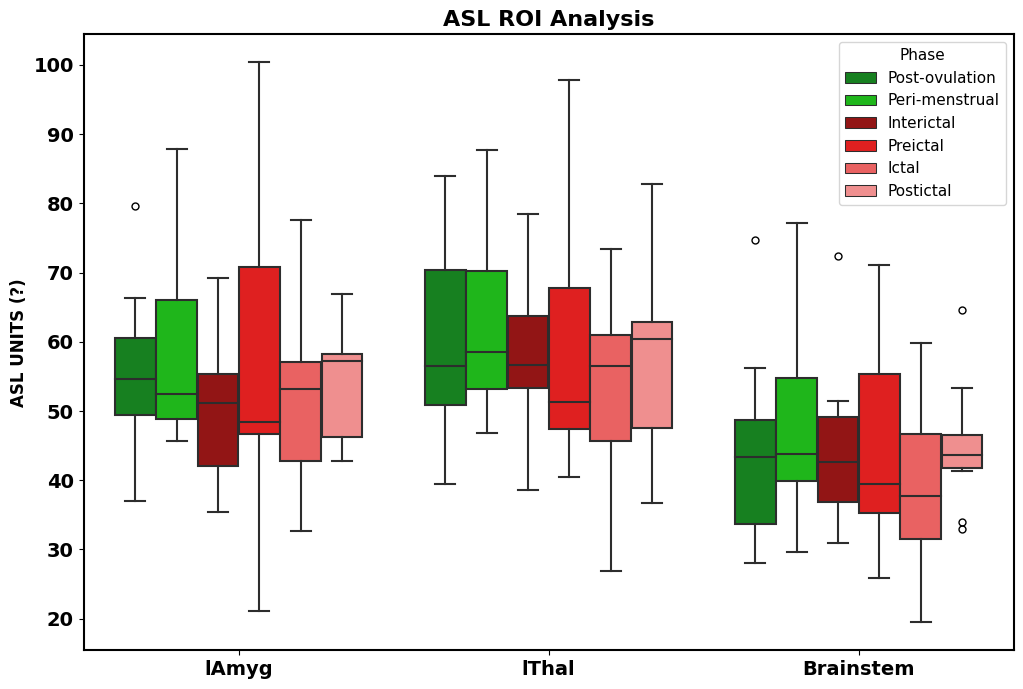

In [38]:
costum_palette = sns.color_palette(["#059212","#06D001",
                                    "#a70000", "#ff0000", "#ff4c4c", "#ff7f7f"])
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5)
plt.figure(figsize=(12, 8))
sns.boxplot(data=formatdata, x='ROI', y='Mean % Signal Change', hue='Phase', palette=costum_palette, flierprops=flierprops)

# Add labels and title
plt.ylabel('ASL UNITS (?)', fontsize=12, weight='bold')
plt.xlabel('', fontsize=0)  # Remove the x-axis label
plt.title('ASL ROI Analysis', fontsize=16, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Customize axis lines
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Show legend
plt.legend(title='Phase', fontsize=11, title_fontsize=11)

# Show plot
plt.show()

### Remaining ROIs from paper

(aPHG, pPHG, ACC, MCC, PCC) (Insula, LG, Cb, lPutamen, FG) (Right Inferior Occipital Gyrus, Left Inferior Occipital Gyrus, Right Middle Occipital Gyrus, Left Middle Occipital Gyrus)

14 ROIs --> 2 grafs de 5 e 1 de 4

In [39]:
print(ROI_names)

['Hypothalamus', 'aPHG', 'pPHG', 'ACC', 'MCC', 'PCC', 'Insula', 'MFG', 'LG', 'Cb', 'Ramyg', 'Lamyg', 'Rthal', 'Lthal', 'Brainstem', 'Rputamen', 'Lputamen', 'FG', 'OIL', 'OIR', 'OML', 'OMR']


In [40]:
ASLrois1_mid = [allROIsASL_mid[1], allROIsASL_mid[2], allROIsASL_mid[3], allROIsASL_mid[4], allROIsASL_mid[5]]
ASLrois1_premens = [allROIsASL_premens[1], allROIsASL_premens[2], allROIsASL_premens[3], allROIsASL_premens[4], allROIsASL_premens[5]]
ASLrois1_int = [allROIsASL_int[1], allROIsASL_int[2], allROIsASL_int[3], allROIsASL_int[4], allROIsASL_int[5]]
ASLrois1_preict = [allROIsASL_preict[1], allROIsASL_preict[2], allROIsASL_preict[3], allROIsASL_preict[4], allROIsASL_preict[5]]
ASLrois1_ict = [allROIsASL_ict[1], allROIsASL_ict[2], allROIsASL_ict[3], allROIsASL_ict[4], allROIsASL_ict[5]]
ASLrois1_postict = [allROIsASL_postict[1], allROIsASL_postict[2], allROIsASL_postict[3], allROIsASL_postict[4], allROIsASL_postict[5]]

In [41]:
formatdata = pd.DataFrame({
    'Phase': (['Post-ovulation'] * (len(ASLrois1_mid[0]) + len(ASLrois1_mid[1]) + len(ASLrois1_mid[2]) + len(ASLrois1_mid[3]) + len(ASLrois1_mid[4]))) +
             (['Peri-menstrual'] * (len(ASLrois1_premens[0]) + len(ASLrois1_premens[1]) + len(ASLrois1_premens[2]) + len(ASLrois1_premens[3]) + len(ASLrois1_premens[4]))) +
             (['Interictal'] * (len(ASLrois1_int[0]) + len(ASLrois1_int[1]) + len(ASLrois1_int[2]) + len(ASLrois1_int[3]) + len(ASLrois1_int[4]))) +
             (['Preictal'] * (len(ASLrois1_preict[0]) + len(ASLrois1_preict[1]) + len(ASLrois1_preict[2]) + len(ASLrois1_preict[3]) + len(ASLrois1_preict[4]))) +
             (['Ictal'] * (len(ASLrois1_ict[0]) + len(ASLrois1_ict[1]) + len(ASLrois1_ict[2]) + len(ASLrois1_ict[3]) + len(ASLrois1_ict[4]))) +
             (['Postictal'] * (len(ASLrois1_postict[0]) + len(ASLrois1_postict[1]) + len(ASLrois1_postict[2]) + len(ASLrois1_postict[3]) + len(ASLrois1_postict[4]))),
    'ROI': (['aPHG'] * len(ASLrois1_mid[0]) + ['pPHG'] * len(ASLrois1_mid[1]) + ['ACC'] * len(ASLrois1_mid[2]) + ['MCC'] * len(ASLrois1_mid[3]) + ['PCC'] * len(ASLrois1_mid[4])) +
           (['aPHG'] * len(ASLrois1_premens[0]) + ['pPHG'] * len(ASLrois1_premens[1]) + ['ACC'] * len(ASLrois1_premens[2]) + ['MCC'] * len(ASLrois1_premens[3]) + ['PCC'] * len(ASLrois1_premens[4])) +
           (['aPHG'] * len(ASLrois1_int[0]) + ['pPHG'] * len(ASLrois1_int[1]) + ['ACC'] * len(ASLrois1_int[2]) + ['MCC'] * len(ASLrois1_int[3]) + ['PCC'] * len(ASLrois1_int[4])) +
           (['aPHG'] * len(ASLrois1_preict[0]) + ['pPHG'] * len(ASLrois1_preict[1]) + ['ACC'] * len(ASLrois1_preict[2]) + ['MCC'] * len(ASLrois1_preict[3]) + ['PCC'] * len(ASLrois1_preict[4])) +
           (['aPHG'] * len(ASLrois1_ict[0]) + ['pPHG'] * len(ASLrois1_ict[1]) + ['ACC'] * len(ASLrois1_ict[2]) + ['MCC'] * len(ASLrois1_ict[3]) + ['PCC'] * len(ASLrois1_ict[4])) +
           (['aPHG'] * len(ASLrois1_postict[0]) + ['pPHG'] * len(ASLrois1_postict[1]) + ['ACC'] * len(ASLrois1_postict[2]) + ['MCC'] * len(ASLrois1_postict[3]) + ['PCC'] * len(ASLrois1_postict[4])),
    'Mean % Signal Change': (ASLrois1_mid[0] + ASLrois1_mid[1] + ASLrois1_mid[2] + ASLrois1_mid[3] + ASLrois1_mid[4]) +
                                (ASLrois1_premens[0] + ASLrois1_premens[1] + ASLrois1_premens[2] + ASLrois1_premens[3] + ASLrois1_premens[4]) +
                                (ASLrois1_int[0] + ASLrois1_int[1] + ASLrois1_int[2] + ASLrois1_int[3] + ASLrois1_int[4]) +
                                (ASLrois1_preict[0] + ASLrois1_preict[1] + ASLrois1_preict[2] + ASLrois1_preict[3] + ASLrois1_preict[4]) +
                                (ASLrois1_ict[0] + ASLrois1_ict[1] + ASLrois1_ict[2] + ASLrois1_ict[3] + ASLrois1_ict[4]) +
                                (ASLrois1_postict[0] + ASLrois1_postict[1] + ASLrois1_postict[2] + ASLrois1_postict[3] + ASLrois1_postict[4])
})

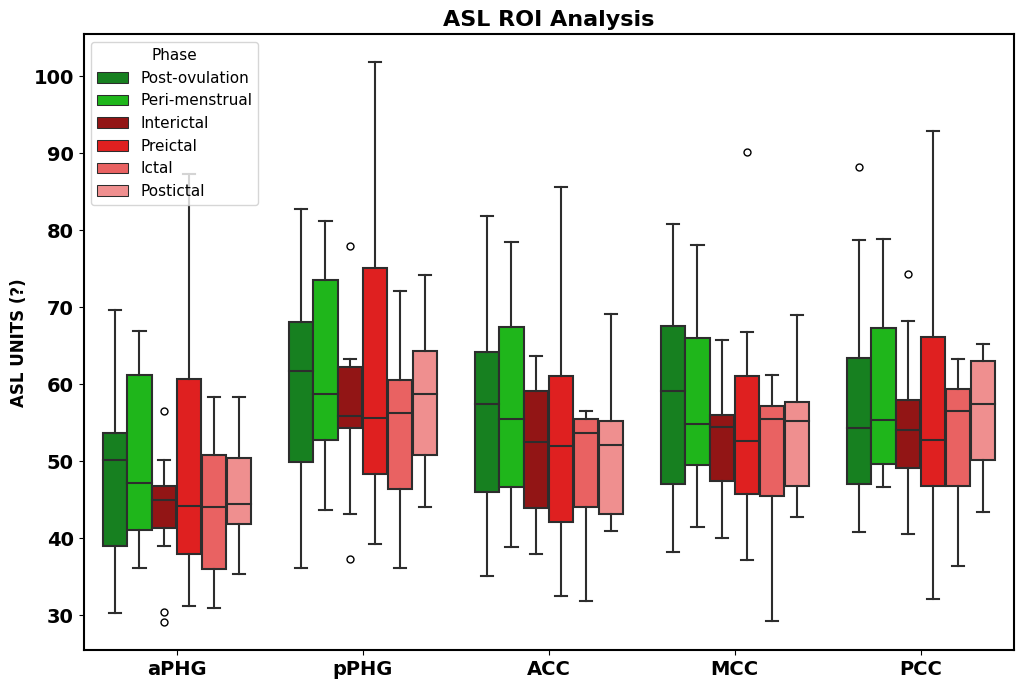

In [42]:
costum_palette = sns.color_palette(["#059212","#06D001",
                                    "#a70000", "#ff0000", "#ff4c4c", "#ff7f7f"])
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5)
plt.figure(figsize=(12, 8))
sns.boxplot(data=formatdata, x='ROI', y='Mean % Signal Change', hue='Phase', palette=costum_palette, flierprops=flierprops)

# Add labels and title
plt.ylabel('ASL UNITS (?)', fontsize=12, weight='bold')
plt.xlabel('', fontsize=0)  # Remove the x-axis label
plt.title('ASL ROI Analysis', fontsize=16, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Customize axis lines
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Show legend
plt.legend(title='Phase', fontsize=11, title_fontsize=11)

# Show plot
plt.show()

In [43]:
print(ROI_names)

['Hypothalamus', 'aPHG', 'pPHG', 'ACC', 'MCC', 'PCC', 'Insula', 'MFG', 'LG', 'Cb', 'Ramyg', 'Lamyg', 'Rthal', 'Lthal', 'Brainstem', 'Rputamen', 'Lputamen', 'FG', 'OIL', 'OIR', 'OML', 'OMR']


In [44]:
ASLrois2_mid = [allROIsASL_mid[6],allROIsASL_mid[8],allROIsASL_mid[9],allROIsASL_mid[16],allROIsASL_mid[17]]
ASLrois2_premens = [allROIsASL_premens[6], allROIsASL_premens[8], allROIsASL_premens[9], allROIsASL_premens[16], allROIsASL_premens[17]]
ASLrois2_int = [allROIsASL_int[6], allROIsASL_int[8], allROIsASL_int[9], allROIsASL_int[16], allROIsASL_int[17]]
ASLrois2_preict = [allROIsASL_preict[6], allROIsASL_preict[8], allROIsASL_preict[9], allROIsASL_preict[16], allROIsASL_preict[17]]
ASLrois2_ict = [allROIsASL_ict[6], allROIsASL_ict[8], allROIsASL_ict[9], allROIsASL_ict[16], allROIsASL_ict[17]]
ASLrois2_postict = [allROIsASL_postict[6], allROIsASL_postict[8], allROIsASL_postict[9], allROIsASL_postict[16], allROIsASL_postict[17]]


In [45]:
formatdata = pd.DataFrame({
    'Phase': (['Post-ovulation'] * (len(ASLrois2_mid[0]) + len(ASLrois2_mid[1]) + len(ASLrois2_mid[2]) + len(ASLrois2_mid[3]) + len(ASLrois2_mid[4]))) +
             (['Peri-menstrual'] * (len(ASLrois2_premens[0]) + len(ASLrois2_premens[1]) + len(ASLrois2_premens[2]) + len(ASLrois2_premens[3]) + len(ASLrois2_premens[4]))) +
             (['Interictal'] * (len(ASLrois2_int[0]) + len(ASLrois2_int[1]) + len(ASLrois2_int[2]) + len(ASLrois2_int[3]) + len(ASLrois2_int[4]))) +
             (['Preictal'] * (len(ASLrois2_preict[0]) + len(ASLrois2_preict[1]) + len(ASLrois2_preict[2]) + len(ASLrois2_preict[3]) + len(ASLrois2_preict[4]))) +
             (['Ictal'] * (len(ASLrois2_ict[0]) + len(ASLrois2_ict[1]) + len(ASLrois2_ict[2]) + len(ASLrois2_ict[3]) + len(ASLrois2_ict[4]))) +
             (['Postictal'] * (len(ASLrois2_postict[0]) + len(ASLrois2_postict[1]) + len(ASLrois2_postict[2]) + len(ASLrois2_postict[3]) + len(ASLrois2_postict[4]))),
    'ROI': (['Insula'] * len(ASLrois2_mid[0]) + ['LG'] * len(ASLrois2_mid[1]) + ['Cb'] * len(ASLrois2_mid[2]) + ['lPutamen'] * len(ASLrois2_mid[3]) + ['FG'] * len(ASLrois2_mid[4])) +
           (['Insula'] * len(ASLrois2_premens[0]) + ['LG'] * len(ASLrois2_premens[1]) + ['Cb'] * len(ASLrois2_premens[2]) + ['lPutamen'] * len(ASLrois2_premens[3]) + ['FG'] * len(ASLrois2_premens[4])) +
           (['Insula'] * len(ASLrois2_int[0]) + ['LG'] * len(ASLrois2_int[1]) + ['Cb'] * len(ASLrois2_int[2]) + ['lPutamen'] * len(ASLrois2_int[3]) + ['FG'] * len(ASLrois2_int[4])) +
           (['Insula'] * len(ASLrois2_preict[0]) + ['LG'] * len(ASLrois2_preict[1]) + ['Cb'] * len(ASLrois2_preict[2]) + ['lPutamen'] * len(ASLrois2_preict[3]) + ['FG'] * len(ASLrois2_preict[4])) +
           (['Insula'] * len(ASLrois2_ict[0]) + ['LG'] * len(ASLrois2_ict[1]) + ['Cb'] * len(ASLrois2_ict[2]) + ['lPutamen'] * len(ASLrois2_ict[3]) + ['FG'] * len(ASLrois2_ict[4])) +
           (['Insula'] * len(ASLrois2_postict[0]) + ['LG'] * len(ASLrois2_postict[1]) + ['Cb'] * len(ASLrois2_postict[2]) + ['lPutamen'] * len(ASLrois2_postict[3]) + ['FG'] * len(ASLrois2_postict[4])),
    'Mean % Signal Change': (ASLrois2_mid[0] + ASLrois2_mid[1] + ASLrois2_mid[2] + ASLrois2_mid[3] + ASLrois2_mid[4]) +
                                (ASLrois2_premens[0] + ASLrois2_premens[1] + ASLrois2_premens[2] + ASLrois2_premens[3] + ASLrois2_premens[4]) +
                                (ASLrois2_int[0] + ASLrois2_int[1] + ASLrois2_int[2] + ASLrois2_int[3] + ASLrois2_int[4]) +
                                (ASLrois2_preict[0] + ASLrois2_preict[1] + ASLrois2_preict[2] + ASLrois2_preict[3] + ASLrois2_preict[4]) +
                                (ASLrois2_ict[0] + ASLrois2_ict[1] + ASLrois2_ict[2] + ASLrois2_ict[3] + ASLrois2_ict[4]) +
                                (ASLrois2_postict[0] + ASLrois2_postict[1] + ASLrois2_postict[2] + ASLrois2_postict[3] + ASLrois2_postict[4])
})

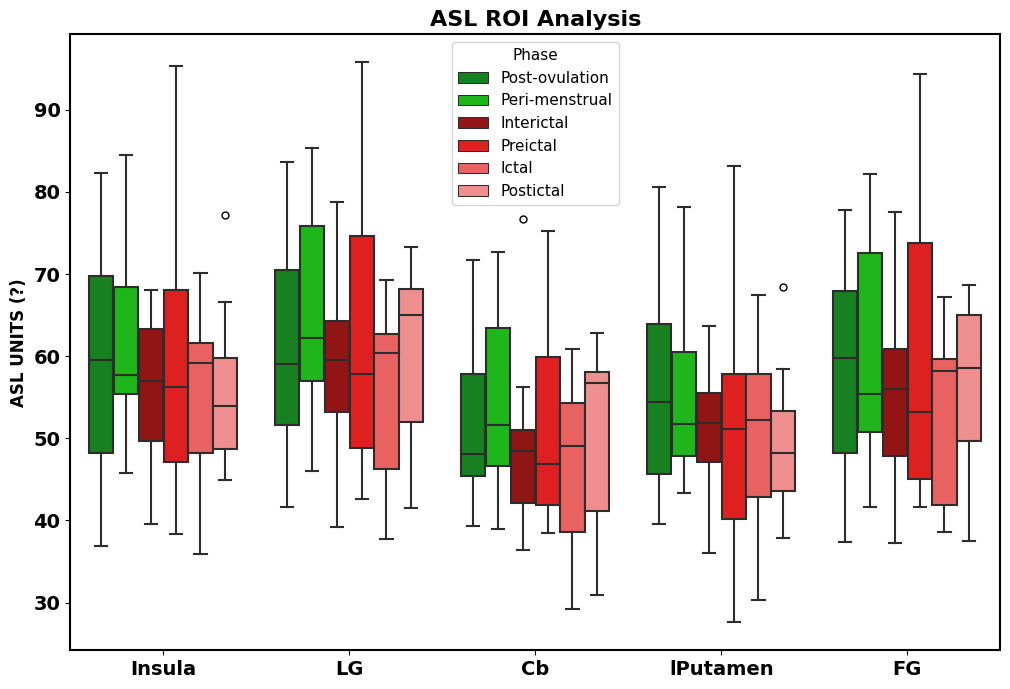

In [46]:
costum_palette = sns.color_palette(["#059212","#06D001",
                                    "#a70000", "#ff0000", "#ff4c4c", "#ff7f7f"])
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5)
plt.figure(figsize=(12, 8))
sns.boxplot(data=formatdata, x='ROI', y='Mean % Signal Change', hue='Phase', palette=costum_palette, flierprops=flierprops)

# Add labels and title
plt.ylabel('ASL UNITS (?)', fontsize=12, weight='bold')
plt.xlabel('', fontsize=0)  # Remove the x-axis label
plt.title('ASL ROI Analysis', fontsize=16, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Customize axis lines
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Show legend
plt.legend(title='Phase', fontsize=11, title_fontsize=11)

# Show plot
plt.show()

In [47]:
print(ROI_names)

['Hypothalamus', 'aPHG', 'pPHG', 'ACC', 'MCC', 'PCC', 'Insula', 'MFG', 'LG', 'Cb', 'Ramyg', 'Lamyg', 'Rthal', 'Lthal', 'Brainstem', 'Rputamen', 'Lputamen', 'FG', 'OIL', 'OIR', 'OML', 'OMR']


In [48]:
aslrois3_mid = [allROIsASL_mid[18],allROIsASL_mid[19],allROIsASL_mid[20],allROIsASL_mid[21]]
aslrois3_premens = [allROIsASL_premens[18], allROIsASL_premens[19], allROIsASL_premens[20], allROIsASL_premens[21]]
aslrois3_int = [allROIsASL_int[18], allROIsASL_int[19], allROIsASL_int[20], allROIsASL_int[21]]
aslrois3_preict = [allROIsASL_preict[18], allROIsASL_preict[19], allROIsASL_preict[20], allROIsASL_preict[21]]
aslrois3_ict = [allROIsASL_ict[18], allROIsASL_ict[19], allROIsASL_ict[20], allROIsASL_ict[21]]
aslrois3_postict = [allROIsASL_postict[18], allROIsASL_postict[19], allROIsASL_postict[20], allROIsASL_postict[21]]

In [49]:
formatdata = pd.DataFrame({
    'Phase': (['Post-ovulation'] * (len(aslrois3_mid[0]) + len(aslrois3_mid[1]) + len(aslrois3_mid[2]) + len(aslrois3_mid[3]))) +
             (['Peri-menstrual'] * (len(aslrois3_premens[0]) + len(aslrois3_premens[1]) + len(aslrois3_premens[2]) + len(aslrois3_premens[3]))) +
             (['Interictal'] * (len(aslrois3_int[0]) + len(aslrois3_int[1]) + len(aslrois3_int[2]) + len(aslrois3_int[3]))) +
             (['Preictal'] * (len(aslrois3_preict[0]) + len(aslrois3_preict[1]) + len(aslrois3_preict[2]) + len(aslrois3_preict[3]))) +
             (['Ictal'] * (len(aslrois3_ict[0]) + len(aslrois3_ict[1]) + len(aslrois3_ict[2]) + len(aslrois3_ict[3]))) +
             (['Postictal'] * (len(aslrois3_postict[0]) + len(aslrois3_postict[1]) + len(aslrois3_postict[2]) + len(aslrois3_postict[3]))),
    'ROI': (['lIOG'] * len(aslrois3_mid[0]) + ['rIOG'] * len(aslrois3_mid[1]) + ['lMOG'] * len(aslrois3_mid[2]) + ['rMOG'] * len(aslrois3_mid[3])) +
           (['lIOG'] * len(aslrois3_premens[0]) + ['rIOG'] * len(aslrois3_premens[1]) + ['lMOG'] * len(aslrois3_premens[2]) + ['rMOG'] * len(aslrois3_premens[3])) +
           (['lIOG'] * len(aslrois3_int[0]) + ['rIOG'] * len(aslrois3_int[1]) + ['lMOG'] * len(aslrois3_int[2]) + ['rMOG'] * len(aslrois3_int[3])) +
           (['lIOG'] * len(aslrois3_preict[0]) + ['rIOG'] * len(aslrois3_preict[1]) + ['lMOG'] * len(aslrois3_preict[2]) + ['rMOG'] * len(aslrois3_preict[3])) +
           (['lIOG'] * len(aslrois3_ict[0]) + ['rIOG'] * len(aslrois3_ict[1]) + ['lMOG'] * len(aslrois3_ict[2]) + ['rMOG'] * len(aslrois3_ict[3])) +
           (['lIOG'] * len(aslrois3_postict[0]) + ['rIOG'] * len(aslrois3_postict[1]) + ['lMOG'] * len(aslrois3_postict[2]) + ['rMOG'] * len(aslrois3_postict[3])),
    'Mean % Signal Change': (aslrois3_mid[0] + aslrois3_mid[1] + aslrois3_mid[2] + aslrois3_mid[3]) +
                                (aslrois3_premens[0] + aslrois3_premens[1] + aslrois3_premens[2] + aslrois3_premens[3]) +
                                (aslrois3_int[0] + aslrois3_int[1] + aslrois3_int[2] + aslrois3_int[3]) +
                                (aslrois3_preict[0] + aslrois3_preict[1] + aslrois3_preict[2] + aslrois3_preict[3]) +
                                (aslrois3_ict[0] + aslrois3_ict[1] + aslrois3_ict[2] + aslrois3_ict[3]) +
                                (aslrois3_postict[0] + aslrois3_postict[1] + aslrois3_postict[2] + aslrois3_postict[3])
})


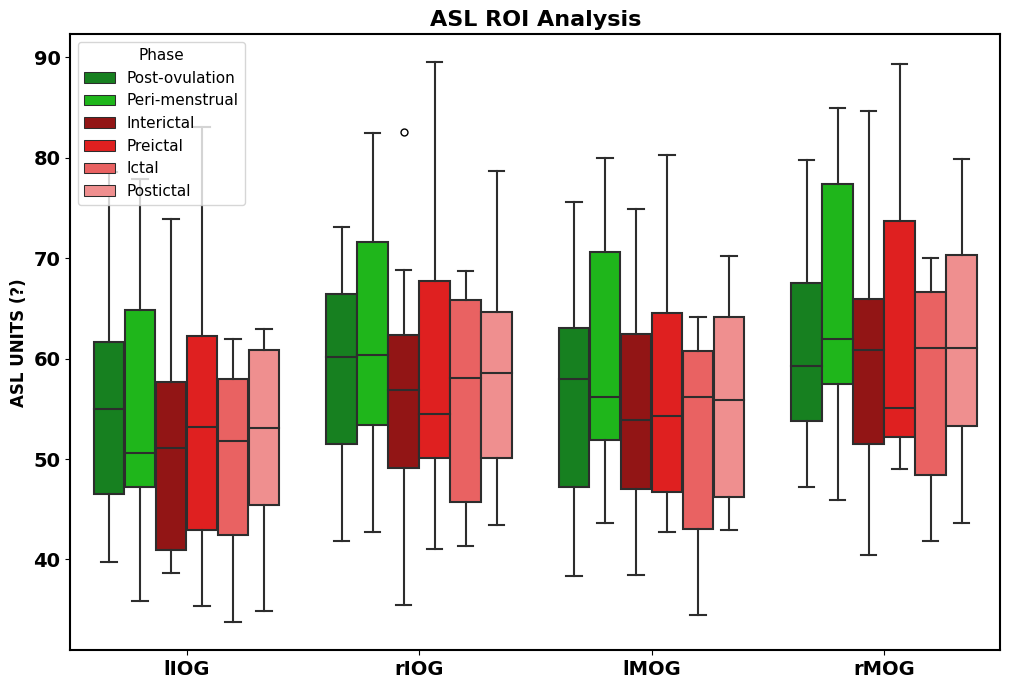

In [50]:
costum_palette = sns.color_palette(["#059212","#06D001",
                                    "#a70000", "#ff0000", "#ff4c4c", "#ff7f7f"])
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5)
plt.figure(figsize=(12, 8))
sns.boxplot(data=formatdata, x='ROI', y='Mean % Signal Change', hue='Phase', palette=costum_palette, flierprops=flierprops)

# Add labels and title
plt.ylabel('ASL UNITS (?)', fontsize=12, weight='bold')
plt.xlabel('', fontsize=0)  # Remove the x-axis label
plt.title('ASL ROI Analysis', fontsize=16, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Customize axis lines
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Show legend
plt.legend(title='Phase', fontsize=11, title_fontsize=11)

# Show plot
plt.show()

## CVR

### Significant ROIs

insula, rputamen, lputamen

In [51]:
print(ROI_names[15])

Rputamen


In [52]:
cvrsig_mid = [allROIsCVR_mid[6],allROIsCVR_mid[15],allROIsCVR_mid[16]]
cvrsig_premens = [allROIsCVR_premens[6], allROIsCVR_premens[15], allROIsCVR_premens[16]]
cvrsig_int = [allROIsCVR_int[6], allROIsCVR_int[15], allROIsCVR_int[16]]
cvrsig_preict = [allROIsCVR_preict[6], allROIsCVR_preict[15], allROIsCVR_preict[16]]
cvrsig_ict = [allROIsCVR_ict[6], allROIsCVR_ict[15], allROIsCVR_ict[16]]
cvrsig_postict = [allROIsCVR_postict[6], allROIsCVR_postict[15], allROIsCVR_postict[16]]

In [53]:
formatdata = pd.DataFrame({
    'Phase': (['Post-ovulation'] * (len(cvrsig_mid[0]) + len(cvrsig_mid[1]) + len(cvrsig_mid[2]))) +
             (['Peri-menstrual'] * (len(cvrsig_premens[0]) + len(cvrsig_premens[1]) + len(cvrsig_premens[2]))) +
             (['Interictal'] * (len(cvrsig_int[0]) + len(cvrsig_int[1]) + len(cvrsig_int[2]))) +
             (['Preictal'] * (len(cvrsig_preict[0]) + len(cvrsig_preict[1]) + len(cvrsig_preict[2]))) +
             (['Ictal'] * (len(cvrsig_ict[0]) + len(cvrsig_ict[1]) + len(cvrsig_ict[2]))) +
             (['Postictal'] * (len(cvrsig_postict[0]) + len(cvrsig_postict[1]) + len(cvrsig_postict[2]))),
    'ROI': (['insula'] * len(cvrsig_mid[0]) + ['lPutamen'] * len(cvrsig_mid[1]) + ['rPutamen'] * len(cvrsig_mid[2])) +
           (['insula'] * len(cvrsig_premens[0]) + ['lPutamen'] * len(cvrsig_premens[1]) + ['rPutamen'] * len(cvrsig_premens[2])) +
           (['insula'] * len(cvrsig_int[0]) + ['lPutamen'] * len(cvrsig_int[1]) + ['rPutamen'] * len(cvrsig_int[2])) +
           (['insula'] * len(cvrsig_preict[0]) + ['lPutamen'] * len(cvrsig_preict[1]) + ['rPutamen'] * len(cvrsig_preict[2])) +
           (['insula'] * len(cvrsig_ict[0]) + ['lPutamen'] * len(cvrsig_ict[1]) + ['rPutamen'] * len(cvrsig_ict[2])) +
           (['insula'] * len(cvrsig_postict[0]) + ['lPutamen'] * len(cvrsig_postict[1]) + ['rPutamen'] * len(cvrsig_postict[2])),
    'Mean % Signal Change': (cvrsig_mid[0] + cvrsig_mid[1] + cvrsig_mid[2]) +
                                (cvrsig_premens[0] + cvrsig_premens[1] + cvrsig_premens[2]) +
                                (cvrsig_int[0] + cvrsig_int[1] + cvrsig_int[2]) +
                                (cvrsig_preict[0] + cvrsig_preict[1] + cvrsig_preict[2]) +
                                (cvrsig_ict[0] + cvrsig_ict[1] + cvrsig_ict[2]) +
                                (cvrsig_postict[0] + cvrsig_postict[1] + cvrsig_postict[2])
})

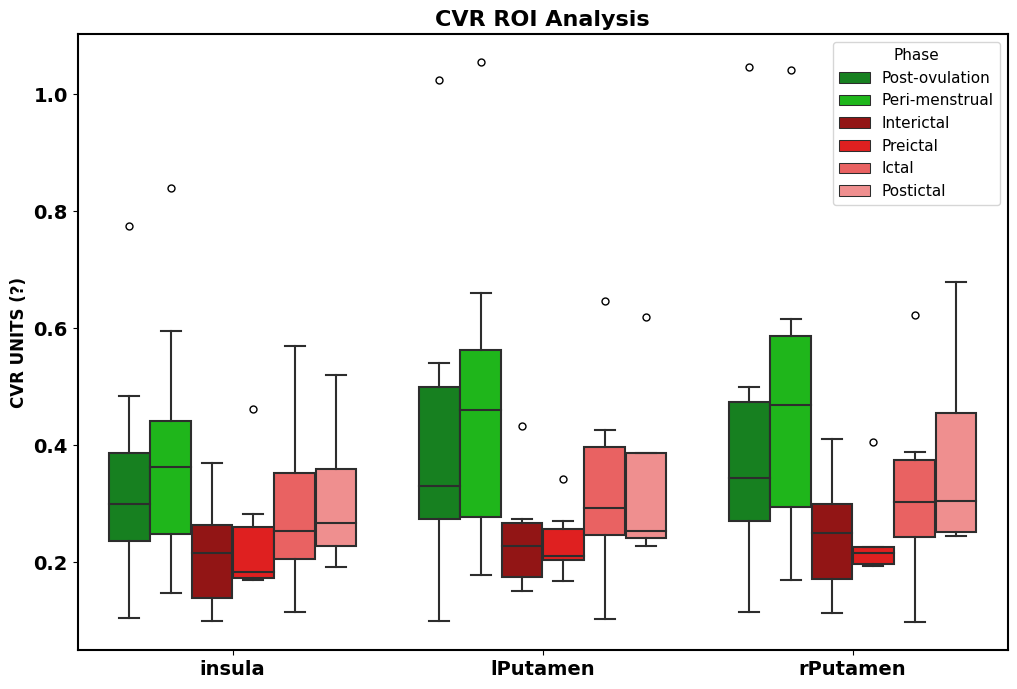

In [54]:
costum_palette = sns.color_palette(["#059212","#06D001",
                                    "#a70000", "#ff0000", "#ff4c4c", "#ff7f7f"])
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5)
plt.figure(figsize=(12, 8))
sns.boxplot(data=formatdata, x='ROI', y='Mean % Signal Change', hue='Phase', palette=costum_palette, flierprops=flierprops)

# Add labels and title
plt.ylabel('CVR UNITS (?)', fontsize=12, weight='bold')
plt.xlabel('', fontsize=0)  # Remove the x-axis label
plt.title('CVR ROI Analysis', fontsize=16, weight='bold')

# Customize tick parameters
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Customize axis lines
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Show legend
plt.legend(title='Phase', fontsize=11, title_fontsize=11)

# Show plot
plt.show()